## CMSE Final Project - The Effect of COVID on Library Checkouts
### Section 001 &emsp;William Chettleburgh &emsp; April 16, 2020


# Background and Motivation

The COVID pandemic has led to a drastic shift in day-to-day life. Work and education have switched to virtual settings, nonessential in-person interactions have ceased, and at the time when people are feeling the weakest and need the most support, we have to keep our distance. Unemployment has risen, political tensions have flared, and all the while, the number of deaths continues to march upward. The complexity and severity of our current situation has brought out both the good and the bad in our nation, leading to the occurence of events and situations that will likely be a subject of study for many decades after it ends. Of course, some of this analysis is best left to a sociologist or historian. Nevertheless, even the typically mundane details of daily life can provide fascinating insight into people's thoughts and actions.

One source that can provide information on this is the books people read. For many people, reading is an integral part of their lives. Whether it be for research, for learning something new, or simply for experiencing a new and different world, the books people read provide insight into their wants, interests, and needs.

The goal of this project will be to use library checkout records to analyze the popularity of a few different subjects over time. Annual trends will be analyzed, and the effect of the COVID pandemic on these trends will be described. This will indirectly provide some information about the effects of COVID on daily life. Ultimately, the question this project aims to answer is:

> How do the popularity of different subject books vary over time, and how has COVID affected these trends?

The checkouts that will be analyzed are from the Seattle Public Library. With 27 branches, it was the 17th most-visited library district in the US in 2016 ("Hours &amp; Locations.", "The Nation's Largest Public Libraries"). They have maintained and made publically available a record of all of their checkouts since 2005, consisting of over 37 million entries ("Checkouts by Title"). Using these checkout records, several specific subjects will be chosen for analysis.

# Methodology

This project will focus on a few distinct subjects specifically chosen for their relevance to COVID or for their general trends. Specifically, the following subjects will be analyzed:
* Travel and Vacations
* Cooking
* Knitting, Crocheting, and Embroidery
* Politics
* Self-Improvement
* Exercise and Fitness

For each subject, a small number of keywords will be chosen. These will then be used as a filter in order to identify the books of this subject. The number of checkouts will be plotted as a percent of total checkouts. The impact of COVID will be discussed, and then various forms of regression will be applied to the pre-COVID data. Justification for these models will be provided, and then a projection of the model will be shown and discussed.

The choice of the number of keywords can have a large effect on the resulting data. When one or two keywords are used, the trends tend to be more well-defined, although it becomes difficult to distinguish whether this is due to trends in the subject itself or trends in the labelling of the materials. On the other hand, when many keywords are used, the trends tend to be less simple and more error-prone as more irrelevant material passes the search criteria. 

For the purposes of regression and finding annual trends, this project will err on the side of using fewer keywords rather than using too many. First, as we will see below, the length of the subjects field remains relatively stable, except for a dip near the beginning of COVID. Since regression will focus on pre-covid trends, the stability of the subject lengths suggests that trends in different labelling practices are unlikely to be significant. Additionally, the data is being analyzed by checkout date, not publication date. Therefore, it is unlikely for trends in subject labelling (which presumably occurs at the date of publication or purchase) to be significant in comparison to trends in subject popularity. 

However, in order to dispel the possibility that labelling practices were the cause of the trends, an additional plot using more keywords will be displayed in cases where other reasonable keywords exist. In depth analysis will not be performed on these plots, both because it will largely be redundant and because the additional keywords can make the trends less precise by introducing more extraneous checkouts (thereby making any models formed with this data less relevant).

Before performing the analysis, the first step is to prepare for reading in the dataset. Below are the necessary import statements for this project.

In [1]:
import numpy as np # Used for arrays, vectorized operations, and polyfit
import math # Used for log10
import pandas as pd # Used for dataframe
import matplotlib.pyplot as plt # Used for plotting
import matplotlib.dates as mdates # Used for date formatting
from matplotlib.lines import Line2D # Used for custom legend
from matplotlib.patches import Patch # Used for custom legend
from IPython.display import display, HTML # Used for displaying text and dataframes
from scipy.optimize import curve_fit # Used for fitting data
from datetime import datetime # Used for dates
%matplotlib inline

Next, we will define a function called `list_unique` which will list the unique entries in a column of a dataframe. This will allow us to better understand and summarize the data we load in, especially given its size.

In [2]:
def list_unique(dataframe, col, sep=None):
    '''List the unique entries in a column of a dataframe.
    
    Parameters
    ----------
    dataframe: DataFrame
        The dataframe from which the column is obtained.
        
    col: label
        The column for which values will be printed.
    
    sep: string, optional
        The delimiter to use when splitting string entries. If None, no splitting occurs.
    
    Returns
    -------
    None
    '''
    if sep == None:
        print("\n".join(dataframe[col].unique()))
    else:
        # str.split splits the string by sep and explode flattens it into a new series
        print("\n".join(dataframe[col].str.split(sep).explode().unique()))

We now can load in the data, storing it to a dataframe called `checkouts`. Due to the size of the dataframe, it will take a very long time to load.

In [3]:
checkouts = pd.read_csv("Checkouts_by_Title.csv")

In [4]:
display(checkouts)

,UsageClass,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear
0,Physical,Horizon,VIDEODISC,2009,10,6,A year in Provence [videorecording] / a BBC TV...,NaN,Mayle Peter Homes and haunts France Provence D...,A & E Television Networks : Distributed in the...,2001.
1,Physical,Horizon,BOOK,2009,10,1,Comic lives inside the world of American stand...,NaN,"Stand up comedy, Comedians United States Biogr...",NaN,NaN
2,Physical,Horizon,BOOK,2009,10,3,"Each peach pear plum : an ""I spy"" story / Jane...","Ahlberg, Janet",Stories in rhyme Juvenile fiction,"Viking Press,",[1979] c1978.
3,Physical,Horizon,BOOK,2009,10,5,K is for Korea / Hyechong Cheung ; [photograph...,"Cheung, Hyechong","English language Alphabet Juvenile literature,...","Frances Lincoln Children's Books,",2008.
4,Physical,Horizon,VIDEODISC,2009,10,9,Curious George Rocket ride and other adventures,NaN,"Adventure and adventurers Fiction, Friendship ...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
37203091,Physical,Horizon,BOOK,2009,10,2,Museum : behind the scenes at the Metropolitan...,"Danziger, Danny","Metropolitan Museum of Art New York N Y, Art m...","Viking,",2007.
37203092,Physical,Horizon,BOOK,2009,10,14,Buffalo before breakfast / by Mary Pope Osborn...,"Osborne, Mary Pope","Time travel Juvenile fiction, Magic Fiction, T...","Random House,",c1999.
37203093,Physical,Horizon,BOOK,2009,10,1,The player / a novel by Michael Tolkin.,"Tolkin, Michael","Hollywood Los Angeles Calif Fiction, Motion pi...","Grove Press,","[1997], c1988."
37203094,Physical,Horizon,BOOK,2009,10,1,Mistwalker,NaN,"Mothers and daughters Fiction, Family problems...",NaN,NaN


From this output, we can see the different columns and what they contain. The column `UsageClass` appears to be either "Physical" or "Digital." `CheckoutType` lists the system with which the checkout was made, and appears to be either "Horizon" or "OverDrive." `MaterialType` provides more specific details about the type of the checkout, including "BOOK," "VIDEODISC," and "AUDIOBOOK." None of these are particularly relevant to our data analysis, but we will use these columns to filter out items which are not related to books.

Next are the columns `CheckoutYear`, `CheckoutMonth`, and `Checkouts`. The first two describe the time frame, which will be the independent variable. The third lists the number of times the item was checked out during that time range, which will be the dependent variable.

Lastly, there are columns describing the item that was checked out: `Title`, `Creator`, `Subjects`, `Publisher`, and `PublicationYear`. The only relevant column of these is `Subjects`, which consists of a comma-separated list of subjects. This column will be used to filter the dataframe.

We will begin by viewing and filtering the first group of columns described. Below are the unique entries in `MaterialType`. Some of the entries consist of multiple entries separated by commas, so the delimiter ", " is included to prevent these combinations from being listed as their own type.

In [5]:
list_unique(checkouts,"MaterialType", ", ")

VIDEODISC
BOOK
SOUNDDISC
AUDIOBOOK
SOUNDCASS
EBOOK
MIXED
KIT
VIDEOCASS
VIDEO
MUSIC
VISUAL
SOUNDREC
CR
MAP
ATLAS
ER
MICROFORM
REGPRINT
MUSICSNDREC
PICTURE
GLOBE
VIDEOCART
VIDEOREC
SLIDE
SONG
PRINT
MOVIE
FLASHCARD
COMPFILE
NONPROJGRAPH
TELEVISION
COMIC
MAGAZINE
LARGEPRINT
NOTATEDMUSIC
VIEW
SECTION
CHART
UNSPECIFIED
REMOTESEN
PHOTO


The focus of this project is on books, so any entries that are not books or are not related to books will be removed. Specifically, the types "BOOK", "AUDIOBOOK", "EBOOK", "COMIC", "MAGAZINE", and "LARGEPRINT" will be kept, and the rest will be removed.

In [6]:
material_types = ["BOOK", "AUDIOBOOK", "EBOOK", "COMIC", "MAGAZINE", "LARGEPRINT"]
checkouts = checkouts[checkouts.MaterialType.str.contains("|".join(material_types))]
material_counts = checkouts.MaterialType.value_counts()
print(material_counts)

BOOK          20309876
EBOOK          5019656
AUDIOBOOK      2102097
COMIC            21492
MAGAZINE          9175
LARGEPRINT        1328
Name: MaterialType, dtype: int64


The majority of entires are either books, ebooks, or audiobooks. This can be visualized using a bar chart. The first chart shows that the majority of checkouts are books, but there are still a noticable number of ebooks and audiobooks. The contribution of comics, magazines, and largeprint only become noticable when using a logarithmic scale.

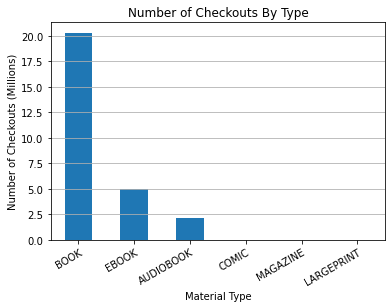

In [7]:
(material_counts/1e6).plot.bar()
plt.title("Number of Checkouts By Type")
plt.xlabel("Material Type")
plt.ylabel("Number of Checkouts (Millions)")
plt.xticks(rotation="30", rotation_mode="anchor", ha="right")
plt.grid(axis="y")
plt.show()

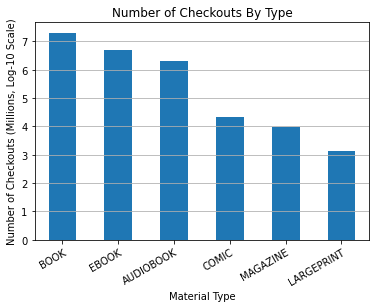

In [8]:
material_counts.apply(math.log10).plot.bar()
plt.title("Number of Checkouts By Type")
plt.xlabel("Material Type")
plt.ylabel("Number of Checkouts (Millions, Log-10 Scale)")
plt.xticks(rotation="30", rotation_mode="anchor", ha="right")
plt.grid(axis="y")
plt.show()

Next, we will print the unique entries in `UsageClass`.

In [9]:
list_unique(checkouts,"UsageClass")

Physical
Digital


Both of these are valid for our analysis, so no filtering is necessary. The following are the unique entries in `CheckoutType`.

In [10]:
list_unique(checkouts,"CheckoutType")

Horizon
OverDrive
Hoopla
Zinio


Clearly, this column simply describes the system that was used to process to checkout, so no filtering is necessary. Likewise, no filtering is needed for the colums `Creator`, `Publisher`, or `PublicationYear`. Therefore, we will remove these columns to reduce the size of our dataframe. We will also sort the entries by `CheckoutYear` and `CheckoutMonth`, and will reset the index. A sample of the dataframe and a statistical summary are shown below.

In [11]:
checkouts = (checkouts
    .drop(["UsageClass", "CheckoutType", "MaterialType", "Creator", "Publisher", "PublicationYear"], axis=1) # axis=1 indicates columns are to be removed
    .sort_values(["CheckoutYear", "CheckoutMonth"]) # Sort by year as the primary column and month as the secondary column
    .reset_index(drop=True))

In [12]:
display(checkouts)

,CheckoutYear,CheckoutMonth,Checkouts,Title,Subjects
0,2005,4,1,Kirigami,Paper work
1,2005,4,1,Kayak touring,Sea kayaking
2,2005,4,1,ultimate dinosaur book,Dinosaurs
3,2005,4,1,In the heart of the country,NaN
4,2005,4,1,darker side generations of horror,Horror fiction
...,...,...,...,...,...
27463619,2021,1,1,The daughter of time / Josephine Tey ; with an...,"Richard III King of England 1452 1485 Fiction,..."
27463620,2021,1,2,The Book of Job: When Bad Things Happened to a...,"Biography & Autobiography, History, Nonfiction..."
27463621,2021,1,3,In praise of shadows / Junʾichirō Tanizaki ; f...,"Aesthetics Japanese, Japan Civilization"
27463622,2021,1,1,Elephants / by Sophie Lockwood ; content advis...,Elephants Juvenile literature


In [13]:
display(checkouts.describe())

,CheckoutYear,CheckoutMonth,Checkouts
count,2.746362e+07,2.746362e+07,2.746362e+07
mean,2.013248e+03,6.496540e+00,2.952534e+00
std,4.417786e+00,3.462017e+00,6.628358e+00
min,2.005000e+03,1.000000e+00,1.000000e+00
25%,2.010000e+03,3.000000e+00,1.000000e+00
50%,2.014000e+03,7.000000e+00,1.000000e+00
75%,2.017000e+03,1.000000e+01,3.000000e+00
max,2.021000e+03,1.200000e+01,4.903000e+03


This summary shows that, on average, each item is checked out 3 times in a month. The least popular item was checked out once (since items that were not checked out are not listed in this dataset). The most popular item was checked out 4903 times in a single month, which is likely due to multiple copies being available.

For each subject that is analyzed, the data will have to be filtered and aggregated by month. Since this process will need to be performed several times, it would be advantageous to define functions that can perform these actions.

First, we will define a function called `avg_by_date` which groups the data by date and aggregates each column using the mean. This will be useful when performing preliminary analysis of our dataframe.

In [14]:
def avg_by_date(dataframe, calc_datetime=True):
    '''Group the dataframe by month and year, and aggregate using the mean.
    
    Parameters
    ----------
    dataframe: DataFrame
        The dataframe to group.
        
    calc_datetime: boolean, optional
        Add a column called "datatime" containing the date as a datetime object if True. Default is True.
        
    Returns
    -------
    output: DataFrame
        The grouped and aggregated dataframe.
    '''
    
    output = dataframe.groupby(["CheckoutYear", "CheckoutMonth"]).mean()
    if calc_datetime:
        output["datetime"] = pd.to_datetime({"year":output.index.get_level_values(0), "month":output.index.get_level_values(1), "day":1}).values
    return output

The next function called `sum_by_date` is almost identical, but instead of aggregating using the mean, it will aggregate using the sum. This will be important for calculating the number of checkouts by subject for each time frame.

In [15]:
def sum_by_date(dataframe, calc_datetime=True):
    '''Group the dataframe by month and year, and aggregate using the sum.
    
    Parameters
    ----------
    dataframe: DataFrame
        The dataframe to group.
        
    calc_datetime: boolean, optional
        Add a column called "datatime" containing the date as a datetime object if True. Default is True.
        
    Returns
    -------
    output: DataFrame
        The grouped and aggregated dataframe.
    '''
    
    output = dataframe.groupby(["CheckoutYear", "CheckoutMonth"]).sum()
    if calc_datetime:
        output["datetime"] = pd.to_datetime({"year":output.index.get_level_values(0), "month":output.index.get_level_values(1), "day":1}).values
    return output

The function `filter_by_subject` will be used to extract checkouts that contain certain keywords in their subject column.

In [16]:
def filter_by_subject(checkouts, subjects):
    '''Filter a dataframe by subjects.
    
    Parameters
    ----------
    dataframe: DataFrame
        The dataframe to filter.
        
    subjects: list
        A list of the keywords to filter by.
        
    Returns
    -------
    output: DataFrame
        The filtered dataframe.
    '''
    
    return checkouts[checkouts.Subjects.str.contains("|".join(subjects), case=False, na=False)] # | is the regex "or"

The general process to be carried out for each subject will be to filter the dataset and then to sum it by date. Given that this process will be repeated multiple times, a function called `sum_subjects` will be written to carry out these steps.

In [17]:
def sum_subjects(checkouts, subjects):
    '''Filter a dataframe by subject and aggregate by month using the sum.
    
    Parameters
    ----------
    checkouts: DataFrame
        The dataframe holding the checkouts to be filtered and aggregated.
        
    subjects: list
        A list of keywords to filter by. Any row that is kept must have at least one of these keywords in the subject.
        
    Returns
    -------
    output: DataFrame
        The filtered and aggregated dataframe.
    '''
    
    output = filter_by_subject(checkouts, subjects)
    output = sum_by_date(output, calc_datetime=False)
    return output

Since the total number of checkouts varies with time (and has certainly fallen due to COVID), our data analysis will focus on the percent of total checkouts that are of certain subjects. Therefore, after using the previous function to obtain a dataframe with the number of checkouts of certain subjects by month, we will want to combine this dataframe with one containing the total number of checkouts. This will then allow the percent to be calculated. The following function carries out this process, taking the two dataframes as input and joining them together.

In [18]:
def join_with_checkouts(total_checkouts, subject_checkouts, suffix):
    '''Join two aggregated dataframes and calculate a column for the subject_checkouts as a percent of total_checkouts.
    
    Parameters
    ----------
    total_checkouts: DataFrame
        The aggregated dataframe representing all checkouts.
        
    subject_checkouts: DataFrame
        The aggregated dataframe representing checkouts meeting a criteria
        
    suffix: string
        The suffix to add to the end of the columns in subject_checkouts.
        
    Returns
    -------
    output: DataFrame
        The joined dataframe.
    '''
    
    output = total_checkouts.join(subject_checkouts, rsuffix=suffix).fillna(0)
    output["Percent"+suffix] = output["Checkouts"+suffix]/output["Checkouts"]*100
    return output

In addition to our aggregation functions, the majority of our plots will have similar qualities, such as the x-axis, the labels, etc. The following function sets these defaults, with options to change or disable one or more of the settings.

In [19]:
def long_graph(start_date=datetime(2005, 1, 1), end_date=datetime(2021, 3, 1), labelled_months = [1,7], size=(20, 4), xticks=True, xlim=True, xformat=True, xlabel=True, ylabel="Percent", grid=True):
    '''Set matplotlib settings that will commonly be used in this project.
    
    Parameters
    ----------
    start_date: datetime, optional
        The date for which the x-axis starts. Defaults to January 2005.
        
    end_date: datetime, optional
        The date for which the x-axis ends. Defaults to March 2021.
        
    labelled_months: list, optional
        A list of integers representing the months to label on the x-axis. Defaults to [1,7], representing January and July.
    
    size: tuple, optional
        The figure size as a tuple. Defaults to 20 by 4. If None, no resizing occurs.
        
    xticks: boolean, optional
        If True, sets the labels on the x-axis to be the dates in date_ax_labels and rotates them. Defaults to True.
    
    xlim: boolean, optional
        If True, sets the limits on the x-axis to be the dates in date_ax_range. Defaults to True.
    
    xformat: boolean, optional
        If True, changes the format of the labels on the x-axis to be in month-year format. Defaults to True.
        
    xlabel: boolean, optional
        If True, labels the x-axis with "Date". Defaults to True.
        
    ylabel: string, optional
        Sets the ylabel. Defaults to "Percent".
        
    grid: boolean, optioanl
        If True, adds a grid. Defaults to True.
        
    Returns
    -------
    None
    '''
    date_list = pd.period_range(start=start_date, end=end_date, freq="M") # Create list of PeriodIndex with frequency of every month
    date_ax_labels = date_list[date_list.month.isin(labelled_months)].to_timestamp() # Filter by months in labelled_months and convert to datetime

    if size != None: plt.figure(figsize=size)
    if xticks: plt.xticks(date_ax_labels, rotation="45", rotation_mode="anchor", ha="right")
    if xlim: plt.xlim(start_date, end_date)
    if xformat: plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%m-%Y"))
    if xlabel: plt.xlabel("Date")
    plt.ylabel(ylabel)
    if grid: plt.grid()

Some of the data is likely to exhibit periodic behavior over the course of a year. The following function adds a background to the graph which can help with visualization of this, by giving the summer months a red background and the winter months a blue background.

In [20]:
def add_background(start_date=datetime(2005, 1, 1), end_date=datetime(2021, 3, 1)):
    '''Add a background to a plot to help with visualization of the months of the year.
    
    Parameters
    ----------
    start_date: datetime, optional
        The date at which the x-axis starts. Defaults to January 2005.
        
    end_date: datetime, optional
        The date at which the x-axis ends. Defaults to March 2021.
    
    Returns
    -------
    None
    '''
    date_list = pd.period_range(start=start_date, end=end_date, freq="M")[:-1] # Exclude the endpoint, since the gradient follows the month
    month_list = date_list.month
    month_gradient = np.minimum(month_list, 14-month_list) # Maximum in July (7) and minimum in January (1)
    month_gradient = np.vstack((month_gradient, month_gradient)) # Convert to 2D array to work with imshow
    # alpha, vmin, and vmax were choosen to make the colors visually-appealing
    plt.imshow(month_gradient, aspect="auto", cmap=plt.get_cmap("coolwarm"), extent=[*plt.xlim(), *plt.ylim()], alpha=0.2, vmin=-1, vmax=9)

The variable `def_colors` contains the default colors used by Matplotlib. The code was obtained from StackOverflow (tmdavison). Due to the addition of a background, we may need to override the legend, and having a list of default colors will be useful in performing this.

In [21]:
def_colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In order to simplify the process of overriding the legend, the function `custom_legend` takes lists of labels, shapes, colors, and transparencies and creates a legend using these arguments.

In [22]:
def custom_legend(labels, shapes=None, colors=None, alphas=None, background=False):
    '''Add a custom legend to a plot.
    
    Parameters
    ----------
    labels: list
        A list of labels to include in the legend
        
    shapes: list, optional
        A list of strings describing the shape to add. 
        "line" or None adds a line, "patch" adds a rectangle, "point" adds a point, and "dash" adds a dashed line.
        The default is None, which causes all entries to be lines.
        
    colors: list, optional
        A list of colors to use in the legend.
        If an entry is None, the next default color is used.
        The default is None, which causes all entries to use the default colors.
        
    alphas: list, optional
        A list of opacities to use in the legend.
        If an entry is None, an opacity of 1 is used.
        The default is None, which causes all entries to have an opacity of 1.
        
    background: boolean, optional
        If true, patches representing the background are added to the end. Defaults to False.
    '''
    
    handles = []
    def_color_count = 0
    if shapes == None: shapes = [None]*len(labels)
    if colors == None: colors = [None]*len(labels)
    if alphas == None: alphas = [None]*len(labels)
    for label, shape, color, alpha in zip(labels, shapes, colors, alphas):
        if color==None:
            color = def_colors[def_color_count]
            def_color_count += 1
        if alpha==None:
            alpha = 1
        if shape == None or shape == "line":
            handles.append(Line2D([0], [0], color=color, alpha=alpha, linestyle="-", label=label))
        elif shape == "patch":
            handles.append(Patch(facecolor=color, alpha=alpha, label=label))
        elif shape == "point":
            handles.append(Line2D([0], [0], marker="o", color="w", markerfacecolor=color, alpha=alpha, markersize=10, label=label))
        elif shape == "dash":
            handles.append(Line2D([0], [0], color=color, alpha=alpha, linestyle="--", label=label))
    if background:
        handles.append(Patch(facecolor="blue", alpha=0.5, label="Winter Months"))
        handles.append(Patch(facecolor="red", alpha=0.5, label="Summer Months"))
    plt.legend(handles=handles)

Lastly, in preparation for regression, it will be necessary to define a function to convert datetime objects to numbers. While using the ordinal might seem like a good choice, this will result in very large numbers that will tend to cause overflow errors during regression. To avoid this, the function `shrink_datetime` will convert datetime objects to a float roughly in the range of 0 to 15.

In [23]:
def shrink_datetime(datetime_list):
    '''Converts an array of dates in ordinal format to smaller numbers. This is useful for regression, where larger numbers may cause an overflow.
    The numbers were empirically choosen to work with the dates in this particular dataset.
    
    Parameters
    ----------
    datetime_list: ndarray
        An array of dates in ordinal form.
        
    Returns
    -------
    output: ndarray
        An array of numbers representing the dates with a smaller magnitude and spacing.
    '''

    return (mdates.date2num(datetime_list)-12000)/500

Now that these functions have been defined, the next step is to perform preliminary analysis of the dataset. Using the `sum_by_date` function, a dataframe called `num_checkouts` is created that describes the total number of checkouts in each month. A sample of this dataframe and a plot are shown below. 

Checkouts   datetime
CheckoutYear CheckoutMonth                      
2005         4                 143053 2005-04-01
             5                 227864 2005-05-01
             6                 287908 2005-06-01
             7                 195018 2005-07-01
             8                 210033 2005-08-01
...                               ...        ...
2020         9                 433867 2020-09-01
             10                454522 2020-10-01
             11                451338 2020-11-01
             12                488393 2020-12-01
2021         1                 522651 2021-01-01

[190 rows x 2 columns]

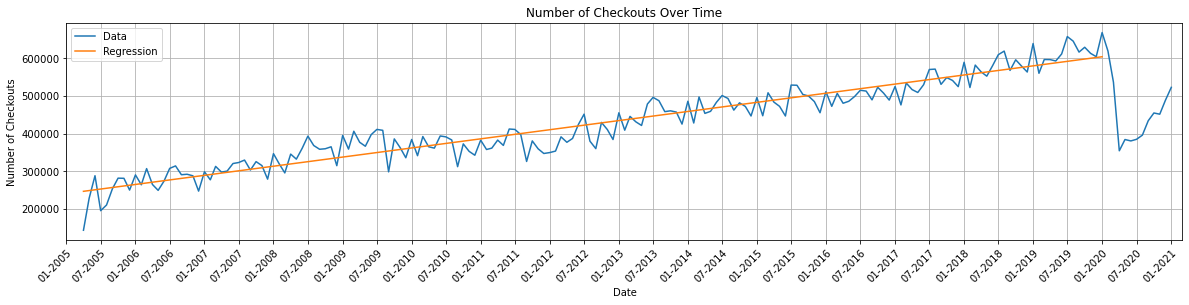

In [24]:
num_checkouts = sum_by_date(checkouts)
display(num_checkouts)

long_graph(ylabel="Number of Checkouts")
plt.plot_date(num_checkouts.datetime, num_checkouts.Checkouts, "-", label="Data")
regression_x = shrink_datetime(num_checkouts.datetime[:-12])
params = np.polyfit(regression_x, num_checkouts.Checkouts[:-12], 1)
reg = np.poly1d(params)
plt.plot_date(num_checkouts.datetime[:-12], reg(regression_x), "-", label="Regression")
plt.title("Number of Checkouts Over Time")
plt.legend()
plt.show()

The total number of checkouts can be fitted with a linear equation, as shown above. This indicates that the number of checkouts has tended to increase over time since 2005. However, near the beginning of 2020, there is a sudden decrease in the total number of checkouts that is likely the result of COVID. Due to this drop (and the linear increase that preceded it), the remaining data analysis will use the percent of total checkouts in order to avoid confounding results with these trends.

From before, it was noticed that the most popular item was checkout out 4903 times. It may be interesting to identify the title of this item. The code below displays the top 10 most popular items.

In [25]:
display(checkouts.nlargest(10, "Checkouts"))

,CheckoutYear,CheckoutMonth,Checkouts,Title,Subjects
26523610,2020,6,4903,So You Want to Talk about Race (Unabridged),"African American Nonfiction, Nonfiction, Polit..."
26529721,2020,6,2177,White Fragility: Why It's So Hard for White Pe...,"Family & Relationships, Nonfiction, Self-Impro..."
26632359,2020,7,2016,So You Want to Talk about Race (Unabridged),"African American Nonfiction, Nonfiction, Polit..."
26341413,2020,4,1894,Harry Potter and the Sorcerer's Stone: Harry P...,"Juvenile Fiction, Juvenile Literature"
26512331,2020,6,1821,How to Be an Antiracist,"Biography & Autobiography, Nonfiction, Politic..."
26535601,2020,6,1709,"Me and White Supremacy: Combat Racism, Change ...","Family & Relationships, Nonfiction, Self-Impro..."
23339799,2018,11,1683,The New Yorker,NaN
23724957,2019,1,1347,The New Yorker,NaN
26128497,2020,3,1270,There There: A Novel,"Fiction, Literature"
23447240,2018,12,1148,The New Yorker,NaN


There are two major points that can be noticed from this output. First, half of the top ten checkouts are about race, and all of these occured in the year of 2020. This can be attributed to the shooting of George Floyd, which occured at the end of May 2020. Second, three of the entries have `NaN` listed for the subject. This is concerning, because if some of the entries do not have subjects listed, then they will fail to contribute to any subject category, and will serve only to decrease the percentages. To investigate further, we will count the number of `NaN` entries.

In [26]:
display(checkouts.isna().sum())

CheckoutYear          0
CheckoutMonth         0
Checkouts             0
Title                 0
Subjects         620187
dtype: int64

Clearly, far more entries besides "The New Yorker" are missing subjects. We can determine the percent of entries that are missing subjects by month using the `avg_by_date` function.

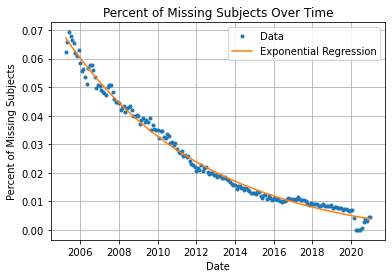

In [27]:
def exponential(x, A, B, C):
    return A*np.exp(B*x)+C

checkouts["Subjects_isna"] = checkouts.Subjects.isna()

checkouts_isna = avg_by_date(checkouts)

plt.plot_date(checkouts_isna.datetime, checkouts_isna.Subjects_isna, ms=3, label="Data")
plt.title("Percent of Missing Subjects Over Time")
plt.xlabel("Date")
plt.ylabel("Percent of Missing Subjects")
plt.grid()

params, _ = curve_fit(exponential, shrink_datetime(checkouts_isna.datetime), checkouts_isna.Subjects_isna, p0=[1, -1,  1])
plt.plot_date(checkouts_isna.datetime, exponential(shrink_datetime(checkouts_isna.datetime), *params), "-", label="Exponential Regression")
plt.legend()
plt.show()

From the graph above, the number of entries missing subjects appears to follow an exponential decay function. In order to facilitate regression using this curve, a function `exponential` is defined. It has the form:

$$y=Ae^{Bx}+C$$

For earlier dates, more entries are missing subjects, while for more recent dates, fewer entries are missing subjects. Since the number of entries that are missing subjects varies with time, it will be necessary to remove these entries from the dataframe. Otherwise, the percent of books about each subject will tend to increase over time, solely due to the fact that older entries are less likely to have a subject at all. As a check, we will recalculate the number of entries missing subjects, which should now be 0.

In [28]:
checkouts = checkouts[~checkouts.Subjects_isna].drop("Subjects_isna", axis=1)
display(checkouts.isna().sum())

CheckoutYear     0
CheckoutMonth    0
Checkouts        0
Title            0
Subjects         0
dtype: int64

One additional test that should be performed is determining whether the average length of the subjects column varies with time.

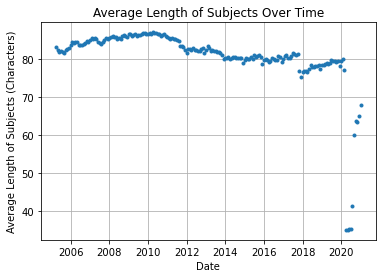

In [29]:
checkouts["Subjects_len"] = checkouts.Subjects.str.len()
checkouts_subj_len = avg_by_date(checkouts)

plt.plot_date(checkouts_subj_len.datetime, checkouts_subj_len.Subjects_len, ms=3)
plt.title("Average Length of Subjects Over Time")
plt.xlabel("Date")
plt.ylabel("Average Length of Subjects (Characters)")
plt.grid()

checkouts = checkouts.drop("Subjects_len", axis=1)

Unfortunately, there appears to be a drop in subject length near the beginning of 2020. This may cause artificial decreases in the percent of books about each subject. There is no easy way to fix this, but the issue is not terribly severe (since the subject lengths are still above 30). We will assume that the decreases that may be caused by this are small compared to the actual trends.

Since we removed entries from the list of checkouts, it needs to be re-aggregated using `sum_by_date`. Then, we can begin analysis on each subject.

In [30]:
num_checkouts = sum_by_date(checkouts)

In order to make summarizing the results easier, key information from the analysis will be stored in the following dictionaries:

In [31]:
maximums_dict = {}
minimums_dict = {}
regression_x_dict = {}
regression_y_dict = {}
covid_change_dict = {}
percent_change_dict = {}

# Travel and Vacations

The first step is to filter the dataframe and join it with `num_checkouts`. The keywords "travel" and "vacation" will be searched for, and the suffix "\_vacation" will be used to label data pertaining to this subject. The data can then be plotted.

In [32]:
subj_vacation = sum_subjects(checkouts, ["travel", "vacation"])
num_checkouts = join_with_checkouts(num_checkouts, subj_vacation, "_vacation")

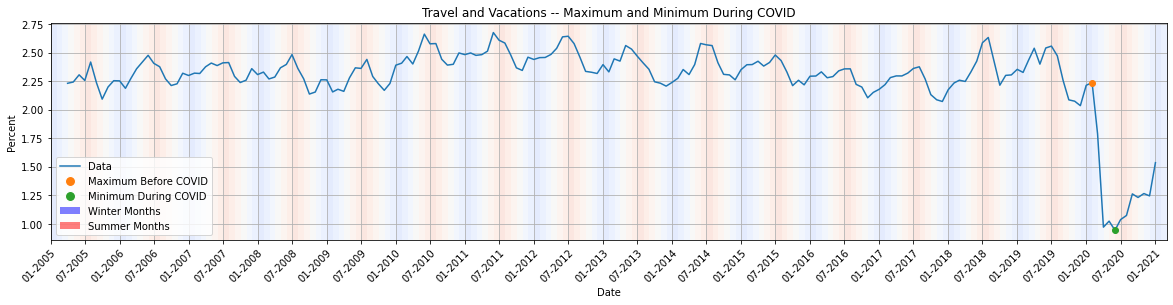

In [33]:
long_graph()
plt.plot_date(num_checkouts.datetime, num_checkouts.Percent_vacation, "-")

covid_region = num_checkouts[num_checkouts.datetime >= datetime(2019,12,1)] # Define a region beginning before COVID
covid_max = covid_region[covid_region.Percent_vacation == max(covid_region.Percent_vacation)] # Identify the max in this region
covid_min = covid_region[covid_region.Percent_vacation == min(covid_region.Percent_vacation)] # Identify the min in this region
plt.plot_date(covid_max.datetime, covid_max.Percent_vacation)
plt.plot_date(covid_min.datetime, covid_min.Percent_vacation)
max_percent = covid_max.Percent_vacation.iloc[0]
min_percent = covid_min.Percent_vacation.iloc[0]
change_percent = max_percent - min_percent

add_background()
plt.title("Travel and Vacations -- Maximum and Minimum During COVID")
custom_legend(["Data", "Maximum Before COVID", "Minimum During COVID"], shapes=["line", "point", "point"], background=True)
plt.show()

display(HTML("The percent of checkouts about travel and vacations decreased by {:.2f}% after COVID began (which is a percent change of {:.2f}%).".format(change_percent, change_percent/max_percent*100)))

covid_change_dict["vacation"] = -change_percent
percent_change_dict["vacation"] = -change_percent/max_percent*100

On the plot above, the maximum value that occured directly before COVID and the minimum value that occured during COVID have been identified. This enables us to calculate the change in checkouts about travel due to COVID. A 1.29% decrease in checkouts occured. Expressed as a percent change, this is a decrease by 57.76%. This agrees with our expectations: due to COVID, travel has been restricted, so the percent of checkouts about travel has decreased.

Additionally, the percent of checkouts about travel appears to follow a sinosoudal curve. It reaches a maximum in the summer and a minimum in the winter. Again, this agrees with our expectations: vacations are most often taken in the summer, so it is reasonable to assume more people check out books about travel in the summer. 

In order to fit the data, a function called `sine` representing a sinosoudal curve is defined. it has the form:

$$y=A\sin(Bx+C)+D$$

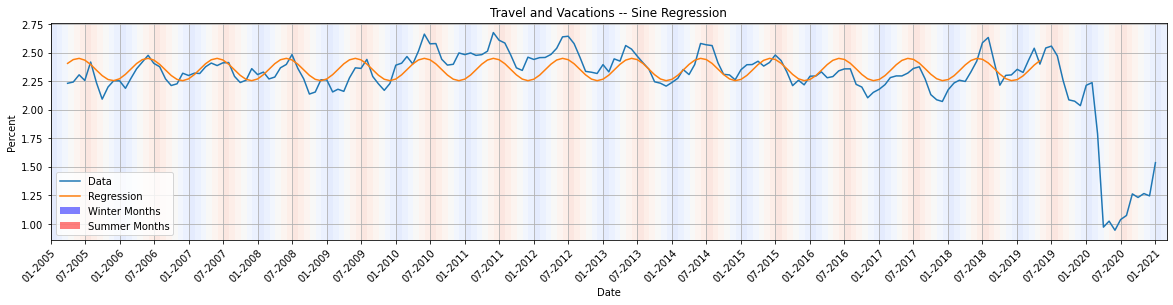

In [34]:
def sine(x, A, B, C, D):
    return A*np.sin(B*x+C)+D

long_graph()
plt.plot_date(num_checkouts.datetime, num_checkouts.Percent_vacation, "-")
regression_x = shrink_datetime(num_checkouts.datetime[:-20]) # Points near COVID are not fitted
p0 = [-9.7720e-02,  8.5850e+00,  1.2826e+00,  2.3537e+00] # The initial values have been set near to the actual values to increase speed and accuracy
sine_params, _ = curve_fit(sine, regression_x, num_checkouts.Percent_vacation[:-20], p0=p0)
sine_y = sine(regression_x, *sine_params)
plt.plot_date(num_checkouts.datetime[:-20], sine_y, "-")
add_background()

plt.title("Travel and Vacations -- Sine Regression")
custom_legend(["Data", "Regression"], background=True)
plt.show()

The regression fits the data fairly well, accurately predicting the dates of the annual maxima and minima. Interestingly, the annual fluctuations in the data appear to increase slower than the sine regression and decrease faster than the sine regression. This may be due to school starting: once school starts in the fall, there is a sudden decrease in vacations. However, even while school is still occuring in the spring, people begin planning for future vacations and trips.

This suggests that perhaps a "skewed" sine graph might fit the data better. The form of the function, based on the equation from StackExchange (McCaughan), is the following:

$$y=\frac{A}{E}\tan^{-1}\left(\frac{E\sin(Bx+C)}{1-E\cos(Bx+C)}\right)+D$$

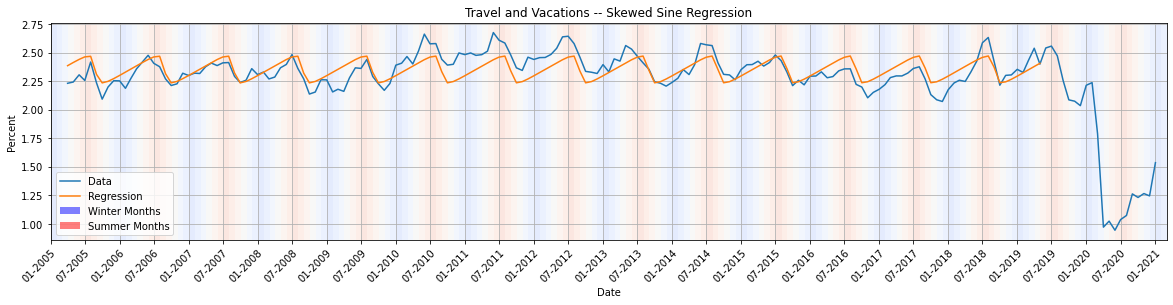

In [35]:
def skew_sine(x, A, B, C, D, E):
    return A/E *np.arctan((E*np.sin(B*x+C))/(1-E*np.cos(B*x+C)))+D

long_graph()
plt.plot_date(num_checkouts.datetime, num_checkouts.Percent_vacation, "-")
p0 = [-1.0054e-01,  8.5893e+00,  1.2901e+00,  2.3543e+00,  8.1957e-01]
skew_params, _ = curve_fit(skew_sine, regression_x, num_checkouts.Percent_vacation[:-20], p0=p0)
skew_y = skew_sine(regression_x, *skew_params)
plt.plot_date(num_checkouts.datetime[:-20], skew_y, "-")
add_background()

plt.title("Travel and Vacations -- Skewed Sine Regression")
custom_legend(["Data", "Regression"], background=True)
plt.show()

regression_x_dict["vacation"] = num_checkouts.datetime[:-20]
regression_y_dict["vacation"] = skew_y

The results of this regression confirm our suspicions: the percent of checkouts about vacations increases slowly over the course of a year, and then decreases quickly in the fall. For this regression, the amplitude of the equation was kept constant. This choice will be justified below. First, the minimum and maximum values in each period will be identified. Then, the difference between adjacent maxima and minima will be calculated and plotted over time.

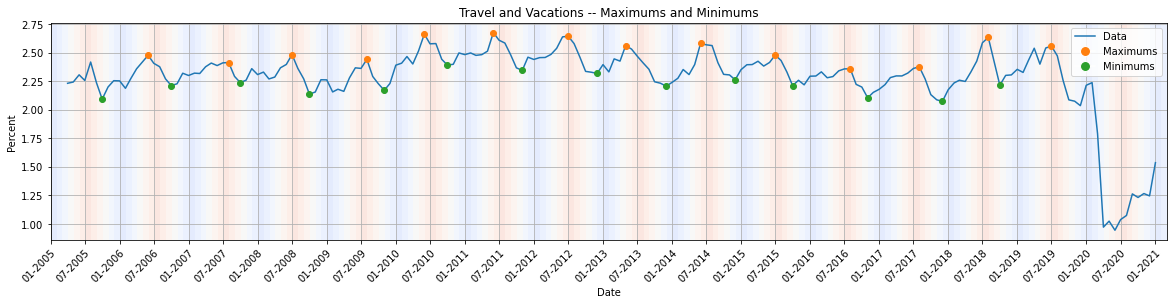

In [36]:
# Identify maxima first, since they fall in the center of the year
# Group by year, get maximum, and use this to mask num_checkouts to only include the maxima 
# Also remove some from the end which correspond to the COVID region
maximums = num_checkouts[num_checkouts.Percent_vacation == num_checkouts.groupby(level=0).Percent_vacation.transform(max)].iloc[:-2]
maximums["Max_Num"] = range(len(maximums)) # Number the maxima
minimums = num_checkouts.copy() # Create a copy of num_checkouts for the minima
minimums["Max_Num"] = maximums.Max_Num # Add a column for Max_Num (maxima will have a number and the rest of the months will have NAN)
minimums = minimums.fillna(method="bfill").dropna() # Backfill Max_Num (so that each month has the number of the next maximum)
# Group by Max_Num (all the months between the maxima), get minimum, and use this to mask num_checkouts to only include minima
# Also remove some from the beginning which do not corresond to actual minima (due to cutoff in the data)
minimums = minimums[minimums.Percent_vacation == minimums.groupby("Max_Num").Percent_vacation.transform(min)].drop("Max_Num", axis=1).iloc[1:]
maximums= maximums.iloc[1:] # Remove some from the beginning which do not correspond to actual maxima (due to cutoff in the data)

long_graph()
plt.plot_date(num_checkouts.datetime, num_checkouts.Percent_vacation, "-")
plt.plot_date(maximums.datetime, maximums.Percent_vacation)
plt.plot_date(minimums.datetime, minimums.Percent_vacation)
add_background()

plt.title("Travel and Vacations -- Maximums and Minimums")
custom_legend(["Data", "Maximums", "Minimums"], ["line", "point", "point"])

plt.show()

maximums_dict["vacation"] = maximums
minimums_dict["vacation"] = minimums

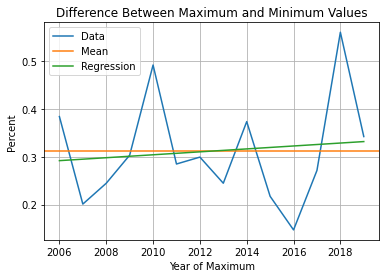

In [37]:
max_min_dif = maximums.Percent_vacation.values-minimums.Percent_vacation.values
years = list(range(2006, 2020))

plt.plot(years, max_min_dif, label="Data")
plt.axhline(max_min_dif.mean(), label="Mean", color=def_colors[1])

params = np.polyfit(years, max_min_dif, 1)
plt.plot(years, np.poly1d(params)(years), label="Regression", color=def_colors[2])

plt.title("Difference Between Maximum and Minimum Values")
plt.xlabel("Year of Maximum")
plt.ylabel("Percent")
plt.legend()
plt.grid()
plt.show()

The differences are fitted with both a constant function (the mean) and a linear function. The linear function has an extremely small slope, which is likely due to error moreso than any actual trend. Therefore, it is reasonable to use a constant for the amplitude.

Lastly, we will provide a projection of the regression model into the future.

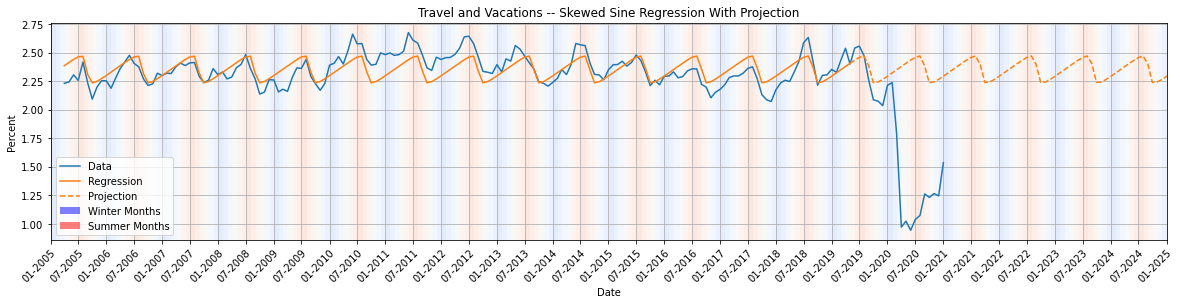

In [38]:
long_graph(end_date=datetime(2025,1,1))
extended_date_range = pd.period_range(start=datetime(2019,4,1), end=datetime(2025,1,1), freq="M")

plt.plot_date(num_checkouts.datetime, num_checkouts.Percent_vacation, "-")
plt.plot_date(num_checkouts.datetime[:-20], skew_y, "-")

extended_reg = skew_sine(shrink_datetime(extended_date_range), *skew_params)
plt.plot_date(extended_date_range, extended_reg, "--", color=def_colors[1])
add_background(end_date=datetime(2025,1,1))

plt.title("Travel and Vacations -- Skewed Sine Regression With Projection")
custom_legend(["Data", "Regression", "Projection"], colors=[None, None, def_colors[1]], shapes=["line", "line", "dash"], background=True)
plt.show()

The projection appears reasonable. It predicts that the oscillations will continue occuring, and that the average percent of checkouts relating to travel within any year will remain constant.

# Cooking

The same basic process will now be conducted with the subject of cooking. The keyword "cook" will be used, since this will match either "cookbook" or "cooking." The suffix "\_cook" will be used to describe data pertaining to this subject.

In [39]:
subj_cook = sum_subjects(checkouts, ["cook"])
num_checkouts = join_with_checkouts(num_checkouts, subj_cook, "_cook")

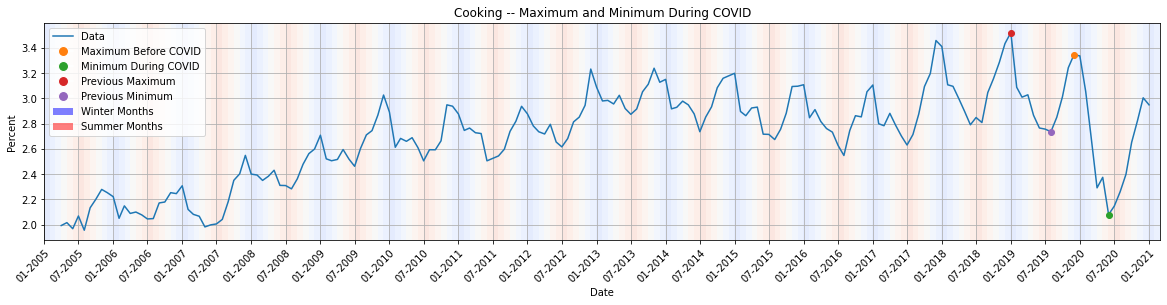

In [40]:
long_graph()
plt.plot_date(num_checkouts.datetime, num_checkouts.Percent_cook, "-")

covid_region = num_checkouts[num_checkouts.datetime >= datetime(2019,12,1)]
covid_max = covid_region[covid_region.Percent_cook == max(covid_region.Percent_cook)]
covid_min = covid_region[covid_region.Percent_cook == min(covid_region.Percent_cook)]
plt.plot_date(covid_max.datetime, covid_max.Percent_cook)
plt.plot_date(covid_min.datetime, covid_min.Percent_cook)
max_percent = covid_max.Percent_cook.iloc[0]
min_percent = covid_min.Percent_cook.iloc[0]
change_percent = max_percent - min_percent

pre_covid_region = num_checkouts[(num_checkouts.datetime >= datetime(2018, 9, 1)) &  (num_checkouts.datetime <= datetime(2019, 9, 1))]
pre_covid_max = pre_covid_region[pre_covid_region.Percent_cook == max(pre_covid_region.Percent_cook)]
pre_covid_min = pre_covid_region[pre_covid_region.Percent_cook == min(pre_covid_region.Percent_cook)]
plt.plot_date(pre_covid_max.datetime, pre_covid_max.Percent_cook)
plt.plot_date(pre_covid_min.datetime, pre_covid_min.Percent_cook)
pre_max_percent = pre_covid_max.Percent_cook.iloc[0]
pre_min_percent = pre_covid_min.Percent_cook.iloc[0]
pre_change_percent = pre_max_percent - pre_min_percent
add_background()
plt.title("Cooking -- Maximum and Minimum During COVID")
custom_legend(["Data", "Maximum Before COVID", "Minimum During COVID", "Previous Maximum", "Previous Minimum"], shapes=["line", "point", "point", "point", "point"], background=True)
plt.show()

display(HTML("The percent of checkouts about cooking decreased by {:.2f}% after COVID began (which is a percent change of {:.2f}%).".format(change_percent, change_percent/max_percent*100)))
display(HTML("The percent of checkouts about cooking had previously decreased by {:.2f}% during the last fluctuation (which is a percent change of {:.2f}%).".format(pre_change_percent, pre_change_percent/pre_max_percent*100)))

covid_change_dict["cook"] = -change_percent
percent_change_dict["cook"] = -change_percent/max_percent*100

The popularity of books about cooking appears to follow a sinusoidal pattern like before. In the late fall and early winter, the popularity of this subject reaches a peak, and in the late spring and early summer, a minimum is reached. This may be explained by the extensive amount of cooking that occurs during Thanksgiving and Christmas; since more cooking is occuring, it is reasonable for more people to check out cookbooks.

There appears to be a decrease in the popularity of cooking at the time of COVID. However, it is difficult to distinguish whether this is due to COVID or due to the regular fluctuations that occur during the year. In order to demonstrate that COVID has had at least some impact, the decrease during this spring and the decrease during last spring have both been calculated. The difference is 1.26% this spring and only 0.78% last spring. Therefore, COVID appears to have caused an additional decrease by approximately .48%.

This data will be fit with a sinusoidal function. However, it appears that there is both a quadratic trend in the average annual number of checkouts and the amplitude of the fluctuation. In order to fit this data, we will first define a function called `quadratic` which holds the general form of a quadratic equation:

$$y=Ax^2+Bx+C$$

Then, we will define a function called `quad_sine` which is a sinusoidal function whose amplitude and average value vary quadratically:

$$y=(Ax^2+Bx+C)\sin(Dx+E)+(Fx^2+Gx+H)$$

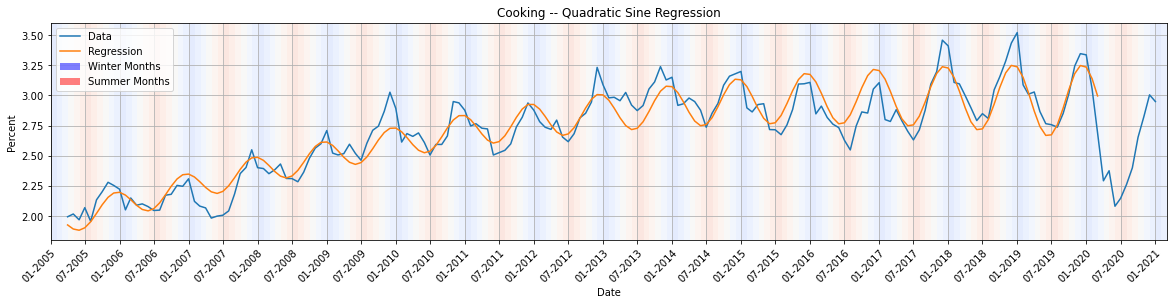

In [41]:
def quadratic(x, A, B, C):
    return A*x**2+B*x+C

def quad_sine(x, A, B, C, D, E, F, G, H):
    return quadratic(x, A, B, C)*np.sin(D*x+E)+quadratic(x, F, G, H)

long_graph()
plt.plot_date(num_checkouts.datetime, num_checkouts.Percent_cook, "-")
regression_x = shrink_datetime(num_checkouts.datetime[:-10])
p0 = [1.2942e-01, -1.1398e-02,  2.0822e-03,  8.5974e+00, 1.0525e+00,  1.5253e+00,  2.7606e-01, -1.3024e-02]
quad_sine_params, _ = curve_fit(quad_sine, regression_x, num_checkouts.Percent_cook[:-10], p0=p0)
quad_sine_y = quad_sine(regression_x, *quad_sine_params)
plt.plot_date(num_checkouts.datetime[:-10], quad_sine_y, "-")
add_background()

plt.title("Cooking -- Quadratic Sine Regression")
custom_legend(["Data", "Regression"], background=True)
plt.show()

regression_x_dict["cook"] = num_checkouts.datetime[:-10]
regression_y_dict["cook"] = quad_sine_y

The model appears to fit the data fairly well, accurately predicting the dates of the minima and maxima, and reflecting the non-constant nature of both the average value and the amplitude. In order to justify this model, we will first show how the data can be fit with a quadratic curve (thereby suggesting that the average value of the sinusoidal model should vary quadratically).

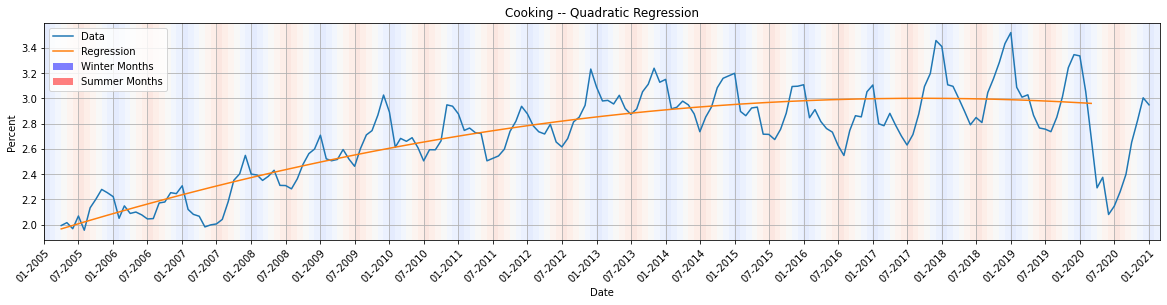

In [42]:
long_graph()
plt.plot_date(num_checkouts.datetime, num_checkouts.Percent_cook, "-")
params = np.polyfit(regression_x, num_checkouts.Percent_cook[:-10], 2)
quadratic_y = np.poly1d(params)(regression_x)
plt.plot_date(num_checkouts.datetime[:-10], quadratic_y, "-")
add_background()

plt.title("Cooking -- Quadratic Regression")
custom_legend(["Data", "Regression"], background=True)
plt.show()

Next, it will be shown that the difference between the local minima and maxima can be fit with a quadratic curve better than a constant, showing that the amplitude of the sinusoidal model should vary quadratically.

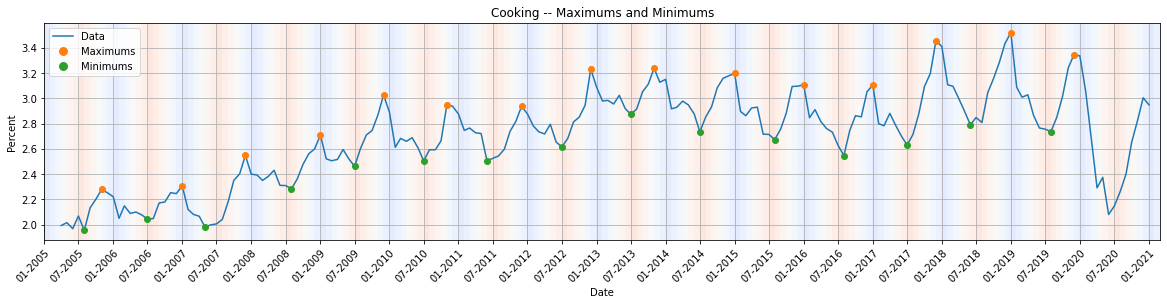

In [43]:
minimums = num_checkouts[num_checkouts.Percent_cook == num_checkouts.groupby(level=0).Percent_cook.transform(min)].iloc[:-1]
minimums["Min_Num"] = range(len(minimums))
maximums = num_checkouts.copy()
maximums["Min_Num"] = minimums.Min_Num
maximums = maximums.fillna(method="bfill").dropna()
maximums = maximums[maximums.Percent_cook == maximums.groupby("Min_Num").Percent_cook.transform(max)].drop("Min_Num", axis=1).iloc[1:]
minimums= minimums.iloc[:-1]

long_graph()
plt.plot_date(num_checkouts.datetime, num_checkouts.Percent_cook, "-")
plt.plot_date(maximums.datetime, maximums.Percent_cook)
plt.plot_date(minimums.datetime, minimums.Percent_cook)
add_background()

plt.title("Cooking -- Maximums and Minimums")
custom_legend(["Data", "Maximums", "Minimums"], ["line", "point", "point"])

plt.show()

maximums_dict["cook"] = maximums
minimums_dict["cook"] = minimums

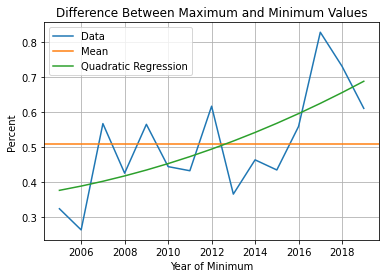

In [44]:
max_min_dif = maximums.Percent_cook.values-minimums.Percent_cook.values
years = list(range(2005, 2020))

plt.plot(years, max_min_dif, label="Data")
plt.axhline(max_min_dif.mean(), label="Mean", color=def_colors[1])

params = np.polyfit(years, max_min_dif, 2)
plt.plot(years, np.poly1d(params)(years), label="Quadratic Regression", color=def_colors[2])

plt.title("Difference Between Maximum and Minimum Values")
plt.xlabel("Year of Minimum")
plt.ylabel("Percent")
plt.legend()
plt.grid()
plt.show()

Lastly, we will provide two projections of this model. The first uses the average value and amplitude from the most recent fluctuation, whereas the second is simply an extension of the quadratic sinusoidal model.

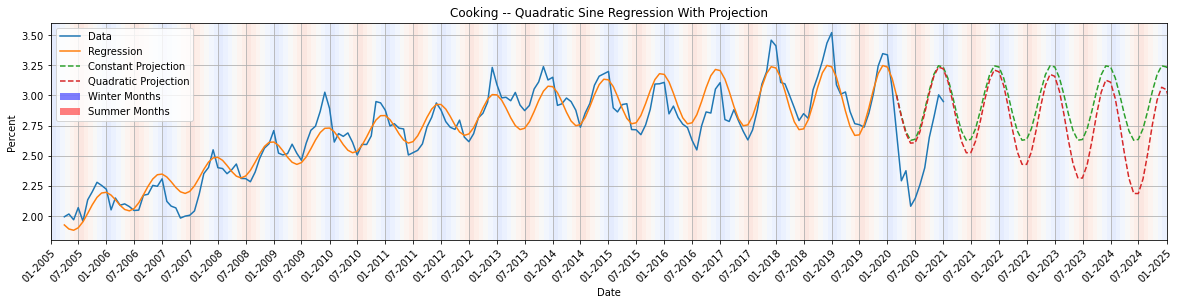

In [45]:
long_graph(end_date=datetime(2025,1,1))
extended_date_range = pd.period_range(start=datetime(2020,2,1), end=datetime(2025,1,1), freq="M")

plt.plot_date(num_checkouts.datetime, num_checkouts.Percent_cook, "-")
plt.plot_date(num_checkouts.datetime[:-10], quad_sine_y, "-")

x = shrink_datetime(datetime(2020,2,1))
A, B, C, D, E, F, G, H = quad_sine_params
extended_sine_params = [quadratic(x, A, B, C), D, E, quadratic(x, F, G, H)]

extended_sine_reg_con = sine(shrink_datetime(extended_date_range), *extended_sine_params)
plt.plot_date(extended_date_range, extended_sine_reg_con, "--")
extended_sine_reg_quad = quad_sine(shrink_datetime(extended_date_range), *quad_sine_params)
plt.plot_date(extended_date_range, extended_sine_reg_quad, "--")
add_background(end_date=datetime(2025,1,1))

plt.title("Cooking -- Quadratic Sine Regression With Projection")
custom_legend(["Data", "Regression", "Constant Projection", "Quadratic Projection"], shapes=["line", "line", "dash", "dash"], background=True)
plt.show()

The quadratic sinusoidal model is useful for fitting existing data, but any quadratic trend is unlikely to be sustained over a long period of time, since it is unbounded. Therefore, the projection using the most recent amplitude and average value is likely to be more representative of the popularity in future years.

Below is a plot using the additional keyword "food" and "recipe." These keywords were not initially included because they may increase the number of irrelevant materials.

In [46]:
subj_cook2 = sum_subjects(checkouts, ["cook", "food", "recipe"])
num_checkouts = join_with_checkouts(num_checkouts, subj_cook2, "_cook2")

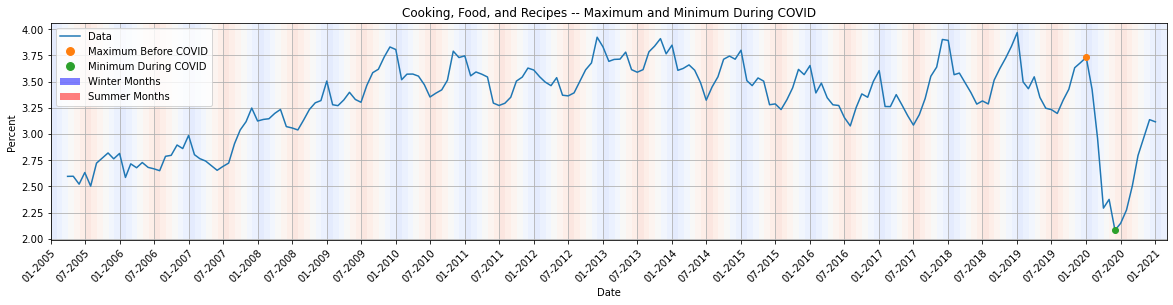

In [47]:
long_graph()
plt.plot_date(num_checkouts.datetime, num_checkouts.Percent_cook2, "-")

covid_region = num_checkouts[num_checkouts.datetime >= datetime(2019,12,1)]
covid_max = covid_region[covid_region.Percent_cook2 == max(covid_region.Percent_cook2)]
covid_min = covid_region[covid_region.Percent_cook2 == min(covid_region.Percent_cook2)]
plt.plot_date(covid_max.datetime, covid_max.Percent_cook2)
plt.plot_date(covid_min.datetime, covid_min.Percent_cook2)
max_percent = covid_max.Percent_cook2.iloc[0]
min_percent = covid_min.Percent_cook2.iloc[0]
change_percent = max_percent - min_percent

add_background()
plt.title("Cooking, Food, and Recipes -- Maximum and Minimum During COVID")
custom_legend(["Data", "Maximum Before COVID", "Minimum During COVID"], shapes=["line", "point", "point"], background=True)
plt.show()

display(HTML("The percent of checkouts about cooking, food, and recipes decreased by {:.2f}% after COVID began (which is a percent change of {:.2f}%).".format(change_percent, change_percent/max_percent*100)))

This plot shows similar trends: the percent of books about cooking has decreased due to COVID, and the popularity tends to be higher in the late fall/early winter and lower in the late spring/early summer. This suggests that the trends analyzed previously were due to popularity in the subject, not trends in labelling practices.

# Knitting, Crocheting, and Embroidery

Next we will analyze knitting, crocheting, and embroidery. The keywords "knit", "crochet", and "embroidery" will be used. The suffix "\_knit" will be used to describe data pertaining to this subject.

In [48]:
subj_knit = sum_subjects(checkouts, ["knit", "crochet", "embroidery"])
num_checkouts = join_with_checkouts(num_checkouts, subj_knit, "_knit")

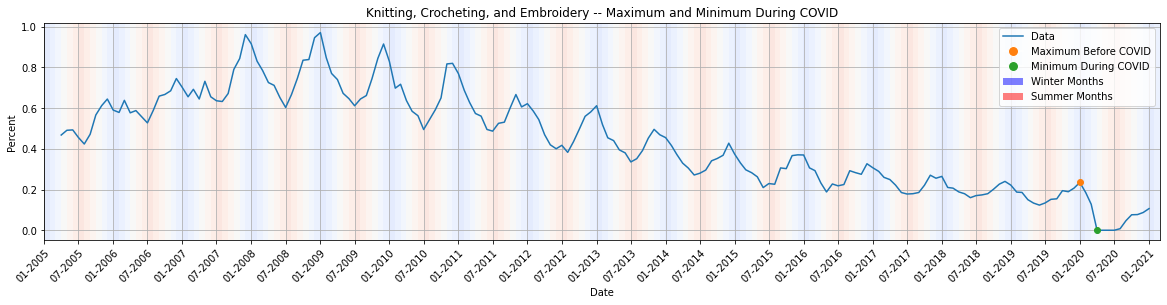

In [49]:
long_graph()
plt.plot_date(num_checkouts.datetime, num_checkouts.Percent_knit, "-")

covid_region = num_checkouts[num_checkouts.datetime >= datetime(2019,12,1)]
covid_max = covid_region[covid_region.Percent_knit == max(covid_region.Percent_knit)]
covid_min = covid_region[covid_region.Percent_knit == min(covid_region.Percent_knit)]
plt.plot_date(covid_max.datetime, covid_max.Percent_knit)
plt.plot_date(covid_min.datetime.iloc[0], covid_min.Percent_knit.iloc[0])
max_percent = covid_max.Percent_knit.iloc[0]
min_percent = covid_min.Percent_knit.iloc[0]
change_percent = max_percent - min_percent

add_background()
plt.title("Knitting, Crocheting, and Embroidery -- Maximum and Minimum During COVID")
custom_legend(["Data", "Maximum Before COVID", "Minimum During COVID"], shapes=["line", "point", "point"], background=True)
plt.show()

display(HTML("The percent of checkouts about knitting, crocheting, and embroidery decreased by {:.2f}% after COVID began (which is a percent change of {:.2f}%).".format(change_percent, change_percent/max_percent*100)))

covid_change_dict["knit"] = -change_percent
percent_change_dict["knit"] = -change_percent/max_percent*100

Despite the expectation that more people might turn to these crafts during times of isolation, there was a sudden decline in the popularity of this subject due to COVID. Specifically, the popularity fell from .23% to 0%, indicating that no books about this subject were checked out. Before COVID, there had been a steady decline in checkouts pertaining to this subject, so this is not surprising. Since knitting constituted a relatively low percent of checkouts before COVID, the drop in the number of checkouts caused these less-popular subjects to lose their representation.

Although knitting may bave increased in popularity due to COVID, as suggested by articles with titles like "Knitting Has Become The Cool Activity During The Coronavirus Crisis" (Mark), the means by which people learn the craft may be through the internet or other resources besides books. This shows one of the limitations of our dataset: the trends we find may be due to changes in subject popularity, or they may be due to changes in the medium with which people learn about this subject.

Like the previous two subjects, there is a periodic fluctuation in the popularity of this subject. In the winter, it appears to be more popular, and in the summer, it is less. This can be explained by the fact that knitting and crocheting are often used to make warm clothing (such as hats and scarves).

In addition to the perdiodic nature of the data, the average values and amplitudes appear to follow an exponential decay for years past 2009. Before that, there is an increase in both of these quantities. This suggests that perhaps the data could be fit by using a sinusoidal curve whose amplitude and average value vary with the sum of two exponential functions (one to represent the increase and one to represent the decrease). In order to test this, we first define the function `sum_exponential` to represent the sum of two exponential functions:

$$y = Ae^{Bx}+Ce^{Dx}+E$$

Then, we define `sum_exponential_sine` as a sinusoidal curve whose amplitude and average value vary as the sum of two exponential functions:

$$y = (Ae^{Bx}+Ce^{Dx}+E)\sin(Fx+G)+(He^{Ix}+Je^{Kx}+L)$$

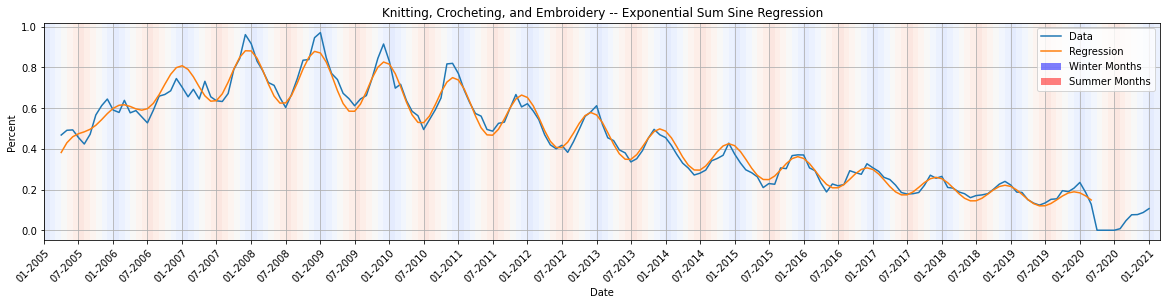

In [50]:
def sum_exponential(x, A, B, C, D, E):
    return exponential(x, A, B, 0) + exponential(x, C, D, E)

def sum_exponential_sine(x, A, B, C, D, E, F, G, H, I, J, K, L):
    return sum_exponential(x, A, B, C, D, E) * np.sin(F*x+G) + sum_exponential(x, H, I, J, K, L)

long_graph()
plt.plot_date(num_checkouts.datetime, num_checkouts.Percent_knit, "-")
p0=[-6.7218e+01, -4.2105e-01,  6.6437e+01, -4.1588e-01, 2.1177e-02,  8.6098e+00,  9.4574e-01, -4.8198e+02, -3.8207e-01,  4.8054e+02, -3.7959e-01,  3.2446e-02]
regression_x = shrink_datetime(num_checkouts.datetime[:-10])
sum_exponential_sine_params, _ = curve_fit(sum_exponential_sine, regression_x, num_checkouts.Percent_knit[:-10], p0=p0)
sum_exponential_sine_y = sum_exponential_sine(regression_x, *sum_exponential_sine_params)
plt.plot_date(num_checkouts.datetime[:-10], sum_exponential_sine_y, "-")
add_background()

plt.title("Knitting, Crocheting, and Embroidery -- Exponential Sum Sine Regression")
custom_legend(["Data", "Regression"], background=True)
plt.show()

regression_x_dict["knit"] = num_checkouts.datetime[:-10]
regression_y_dict["knit"] = sum_exponential_sine_y 

The data is fitted fairly well. The initial increase is somewhat inaccurate, but besides that, the model accurately predicts the locations of the maxima and minima. Additionally, it reflects the decrease in average value and amplitude of the fluctuations.

To justify this model, we will first show how the sum of two exponential functions can be used to fit the data (thereby suggesting that the average value of the sinusoidal model should have this shape).

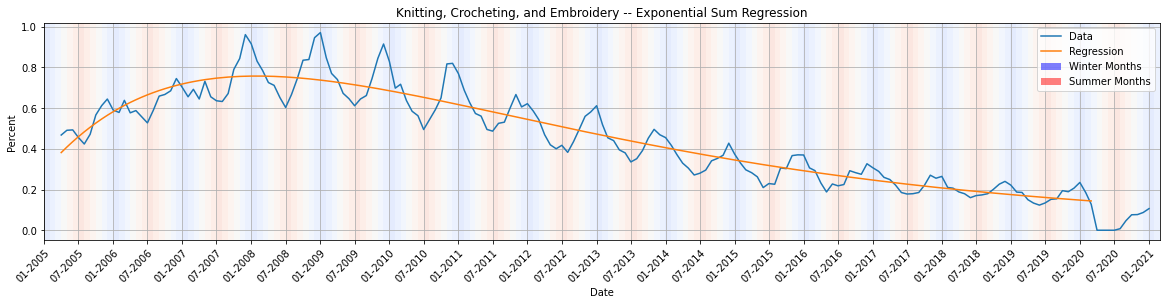

In [51]:
long_graph()
plt.plot_date(num_checkouts.datetime, num_checkouts.Percent_knit, "-")
p0=[-4.8198e+02, -3.8207e-01,  4.8054e+02, -3.7959e-01,  3.2446e-02]
regression_x = shrink_datetime(num_checkouts.datetime[:-10])
sum_exponential_params, _ = curve_fit(sum_exponential, regression_x, num_checkouts.Percent_knit[:-10], p0=p0)
sum_exponential_y = sum_exponential(regression_x, *sum_exponential_params)
plt.plot_date(num_checkouts.datetime[:-10], sum_exponential_y, "-")
add_background()

plt.title("Knitting, Crocheting, and Embroidery -- Exponential Sum Regression")
custom_legend(["Data", "Regression"], background=True)
plt.show()

Next, we will show how the difference between the minima and maxima can be fitted with the sum of two exponential functions (suggesting that the amplitude should also vary according to this function).

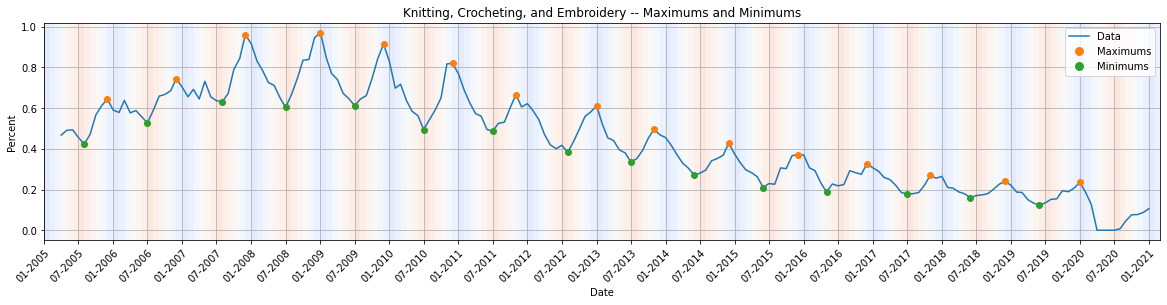

In [52]:
minimums = num_checkouts[num_checkouts.Percent_knit == num_checkouts.groupby(level=0).Percent_knit.transform(min)].iloc[:-4]
minimums["Min_Num"] = range(len(minimums))
maximums = num_checkouts.copy()
maximums["Min_Num"] = minimums.Min_Num
maximums = maximums.fillna(method="bfill").dropna()
maximums = maximums[maximums.Percent_knit == maximums.groupby("Min_Num").Percent_knit.transform(max)].drop("Min_Num", axis=1).iloc[1:]
minimums= minimums.iloc[:-1]

long_graph()
plt.plot_date(num_checkouts.datetime, num_checkouts.Percent_knit, "-")
plt.plot_date(maximums.datetime, maximums.Percent_knit)
plt.plot_date(minimums.datetime, minimums.Percent_knit)
add_background()

plt.title("Knitting, Crocheting, and Embroidery -- Maximums and Minimums")
custom_legend(["Data", "Maximums", "Minimums"], ["line", "point", "point"])

plt.show()

maximums_dict["knit"] = maximums
minimums_dict["knit"] = minimums

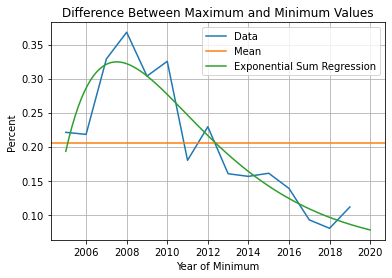

In [53]:
max_min_dif = maximums.Percent_knit.values-minimums.Percent_knit.values
years = np.arange(2005, 2020)
smooth_years = np.linspace(2005, 2020, 100)

plt.plot(years, max_min_dif, label="Data")
plt.axhline(max_min_dif.mean(), label="Mean", color=def_colors[1])

p0=[-6.7218e+01, -4.2105e-01,  6.6437e+01, -4.1588e-01, 3.2446e-02]
sine_params, _ = curve_fit(sum_exponential, years-2005, max_min_dif, p0=p0)
sum_exponential_y = sum_exponential(smooth_years-2005, *sine_params)
plt.plot(smooth_years, sum_exponential_y, "-", color=def_colors[2], label="Exponential Sum Regression")

plt.title("Difference Between Maximum and Minimum Values")
plt.xlabel("Year of Minimum")
plt.ylabel("Percent")
plt.legend()
plt.grid()
plt.show()

Lastly, a projection of the model will be given.

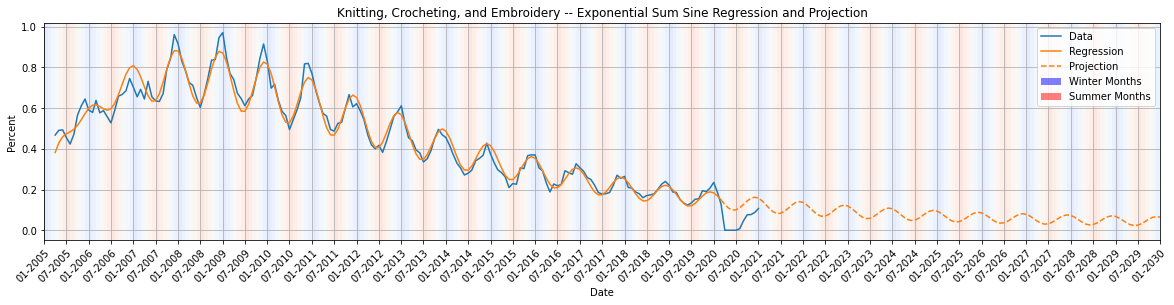

In [54]:
long_graph(end_date=datetime(2030,1,1))
extended_date_range = pd.period_range(start=datetime(2020,2,1), end=datetime(2030,1,1), freq="M")

plt.plot_date(num_checkouts.datetime, num_checkouts.Percent_knit, "-")
plt.plot_date(num_checkouts.datetime[:-10], sum_exponential_sine_y, "-")

extended_reg = sum_exponential_sine(shrink_datetime(extended_date_range), *sum_exponential_sine_params)
plt.plot_date(extended_date_range, extended_reg, "--", color=def_colors[1])

add_background(end_date=datetime(2030,1,1))

plt.title("Knitting, Crocheting, and Embroidery -- Exponential Sum Sine Regression and Projection")
custom_legend(["Data", "Regression", "Projection"], shapes=["line", "line", "dash"], colors=[None, None, def_colors[1]], background=True)
plt.show()

This projection appears reasonable. The model predicts that the fluctuations will continue to occur, although the size of them will become smaller and the popularity of the subject as a whole will continue to decrease, approaching 0.03% on average.

# Politics

During COVID, political tensions have grown significantly. In order to learn more about this, the next topic we will analyze is "politics." The keyword "politic" will be used (which can match "politics" or "political").

In [55]:
subj_politics = sum_subjects(checkouts, ["politic"])
num_checkouts = join_with_checkouts(num_checkouts, subj_politics, "_politics")

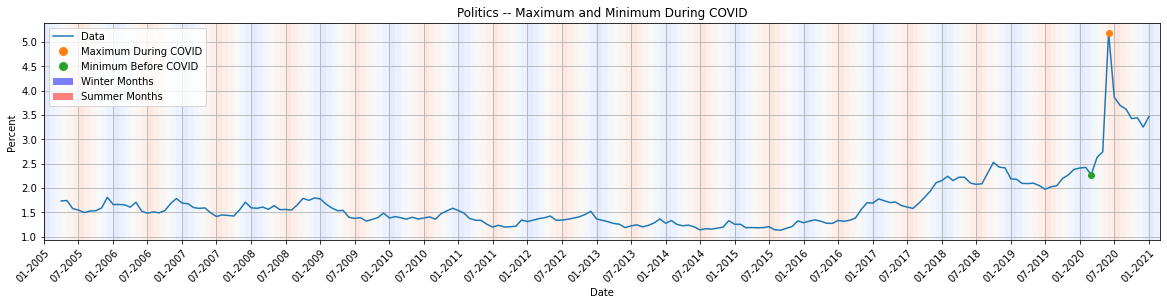

In [56]:
long_graph()
plt.plot_date(num_checkouts.datetime, num_checkouts.Percent_politics, "-")

covid_region = num_checkouts[num_checkouts.datetime >= datetime(2019,12,1)]
covid_max = covid_region[covid_region.Percent_politics == max(covid_region.Percent_politics)]
covid_min = covid_region[covid_region.Percent_politics == min(covid_region.Percent_politics)]
plt.plot_date(covid_max.datetime, covid_max.Percent_politics)
plt.plot_date(covid_min.datetime, covid_min.Percent_politics)
max_percent = covid_max.Percent_politics.iloc[0]
min_percent = covid_min.Percent_politics.iloc[0]
change_percent = max_percent - min_percent

add_background()
plt.title("Politics -- Maximum and Minimum During COVID")
custom_legend(["Data", "Maximum During COVID", "Minimum Before COVID"], shapes=["line", "point", "point"], background=True)
plt.show()

display(HTML("The percent of checkouts about politics increased by {:.2f}% after COVID began (which is a percent change of {:.2f}%).".format(change_percent, change_percent/min_percent*100)))

covid_change_dict["politics"] = change_percent
percent_change_dict["politics"] = change_percent/min_percent*100

As expected, we see a unprecedented increase in the topic after COVID. The percent of checkouts about politics increased by 2.92%, more than doubling its previous value. Even before COVID, there appears to be an increase in the topic. In general, there does not seem to be a significant correlation between the percent of checkouts about politics and the date. Nevertheless, we can attempt to fit it with an exponential model in order to represent the increase between 2017-2019.

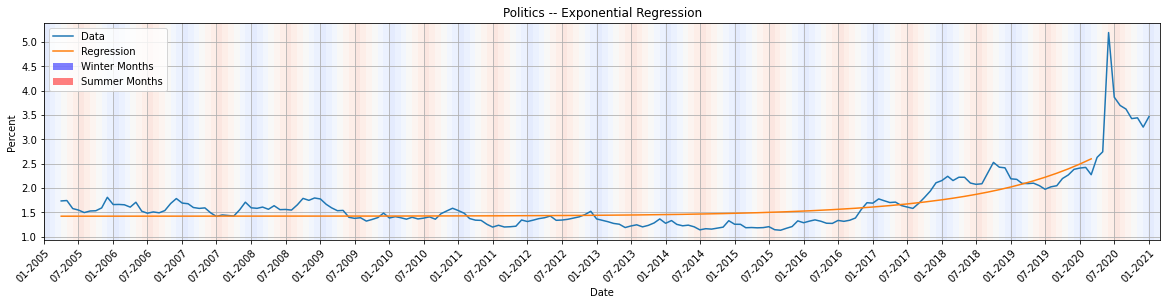

In [57]:
long_graph()
plt.plot_date(num_checkouts.datetime, num_checkouts.Percent_politics, "-")
regression_x = shrink_datetime(num_checkouts.datetime[:-10])
exponential_params, _ = curve_fit(exponential, regression_x, num_checkouts.Percent_politics[:-10])
exponential_y = exponential(regression_x, *exponential_params)
plt.plot_date(num_checkouts.datetime[:-10], exponential_y, "-")
add_background()

plt.title("Politics -- Exponential Regression")
custom_legend(["Data", "Regression"], background=True)
plt.show()

regression_x_dict["politics"] = num_checkouts.datetime[:-10]
regression_y_dict["politics"] = exponential_y

Since the exponential function is unbounded, the projection will eventually fail to produce reasonable results. As more data becomes available, a better model can be choosen to reflect the bounded nature of this variable.

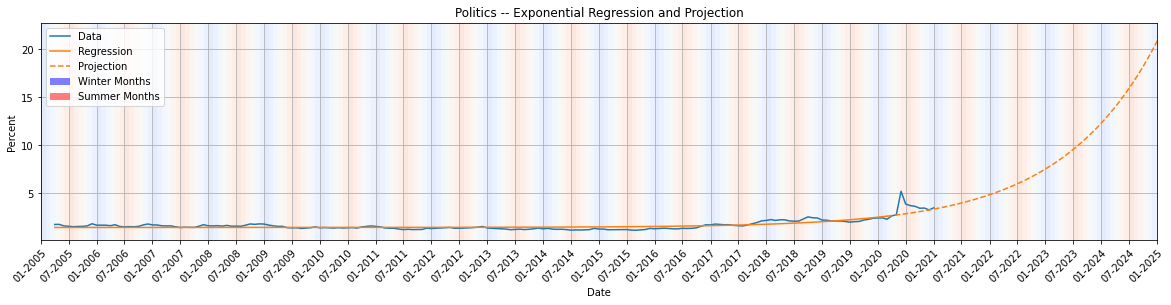

In [58]:
long_graph(end_date=datetime(2025,1,1))
extended_date_range = pd.period_range(start=datetime(2020,2,1), end=datetime(2025,1,1), freq="M")

plt.plot_date(num_checkouts.datetime, num_checkouts.Percent_politics, "-")
plt.plot_date(num_checkouts.datetime[:-10], exponential_y, "-")

extended_reg = exponential(shrink_datetime(extended_date_range), *exponential_params)
plt.plot_date(extended_date_range, extended_reg, "--", color=def_colors[1])

add_background(end_date=datetime(2025,1,1))

plt.title("Politics -- Exponential Regression and Projection")
custom_legend(["Data", "Regression", "Projection"], shapes=["line", "line", "dash"], colors=[None, None, def_colors[1]], background=True)
plt.show()

Similar to the cooking case, there were additional keywords we could have included, such as "race" and "election." While "race" certainly could have been a keyword, it was excluded due to its ambiguity (it could refer to an athletic competition or a demographic). Below, however, we show that similar results are obtained when all of these keywords are used.

In [59]:
subj_politics2 = sum_subjects(checkouts, ["politic", "race", "election"])
num_checkouts = join_with_checkouts(num_checkouts, subj_politics2, "_politics2")

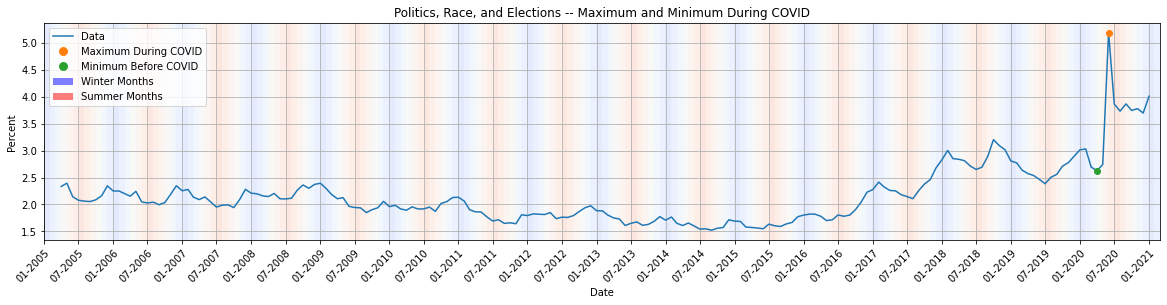

In [60]:
long_graph()
plt.plot_date(num_checkouts.datetime, num_checkouts.Percent_politics2, "-")

covid_region = num_checkouts[num_checkouts.datetime >= datetime(2019,12,1)]
covid_max = covid_region[covid_region.Percent_politics2 == max(covid_region.Percent_politics2)]
covid_min = covid_region[covid_region.Percent_politics2 == min(covid_region.Percent_politics2)]
plt.plot_date(covid_max.datetime, covid_max.Percent_politics2)
plt.plot_date(covid_min.datetime, covid_min.Percent_politics2)
max_percent = covid_max.Percent_politics2.iloc[0]
min_percent = covid_min.Percent_politics2.iloc[0]
change_percent = max_percent - min_percent

add_background()
plt.title("Politics, Race, and Elections -- Maximum and Minimum During COVID")
custom_legend(["Data", "Maximum During COVID", "Minimum Before COVID"], shapes=["line", "point", "point"], background=True)
plt.show()

display(HTML("The percent of checkouts about politics, race, and elections increased by {:.2f}% after COVID began (which is a percent change of {:.2f}%).".format(change_percent, change_percent/min_percent*100)))

# Self-Improvement

The next subject is self-improvement. This subject does not have many synonyms, and the keyword "self-improvement" at first appears very specific. However, this proves to not be an issue; it turns out that "self-improvement" constitutes a sizable percent of checkouts, similar to the other subjects.

In [61]:
subj_self = sum_subjects(checkouts, ["self-improvement"])
num_checkouts = join_with_checkouts(num_checkouts, subj_self, "_self")

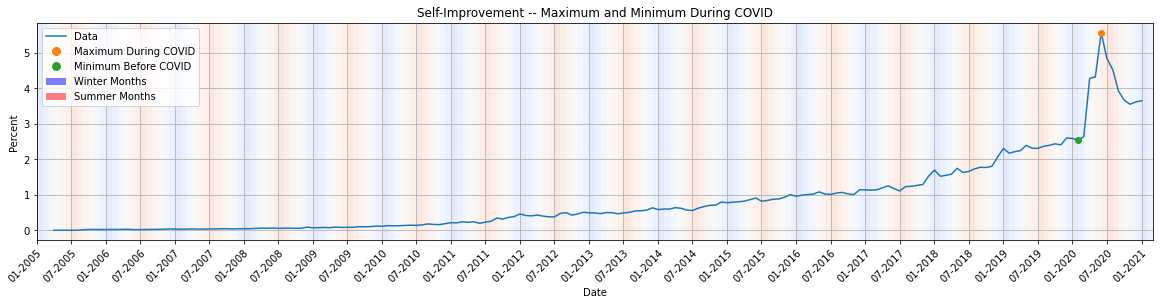

In [62]:
long_graph()
plt.plot_date(num_checkouts.datetime, num_checkouts.Percent_self, "-")

covid_region = num_checkouts[num_checkouts.datetime >= datetime(2019,12,1)]
covid_max = covid_region[covid_region.Percent_self == max(covid_region.Percent_self)]
covid_min = covid_region[covid_region.Percent_self == min(covid_region.Percent_self)]
plt.plot_date(covid_max.datetime, covid_max.Percent_self)
plt.plot_date(covid_min.datetime, covid_min.Percent_self)
max_percent = covid_max.Percent_self.iloc[0]
min_percent = covid_min.Percent_self.iloc[0]
change_percent = max_percent - min_percent

add_background()
plt.title("Self-Improvement -- Maximum and Minimum During COVID")
custom_legend(["Data", "Maximum During COVID", "Minimum Before COVID"], shapes=["line", "point", "point"], background=True)
plt.show()

display(HTML("The percent of checkouts about self-improvement increased by {:.2f}% after COVID began (which is a percent change of {:.2f}%).".format(change_percent, change_percent/min_percent*100)))

covid_change_dict["self"] = change_percent
percent_change_dict["self"] = change_percent/min_percent*100

Mental health has become a more prominent topic in recent years, which explains the increase in this subject over time. Additionally, during COVID, the percent of checkouts about self-improvement increased by 3.04%, more than doubling its previous popularity. This increase is likely due to the difficulty COVID has had on mental health and well-being.

The increase is concave up and asymptotic toward 0% as the date decreases. Thus, an exponential function will be used to fit the data.

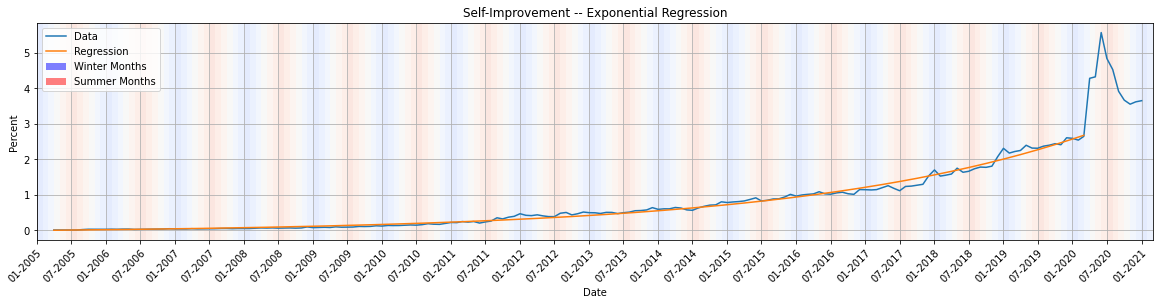

In [63]:
long_graph()
plt.plot_date(num_checkouts.datetime, num_checkouts.Percent_self, "-")
regression_x = shrink_datetime(num_checkouts.datetime[:-10])
exponential_params, _ = curve_fit(exponential, regression_x, num_checkouts.Percent_self[:-10])
exponential_y = exponential(regression_x, *exponential_params)
plt.plot_date(num_checkouts.datetime[:-10], exponential_y, "-")
add_background()

plt.title("Self-Improvement -- Exponential Regression")
custom_legend(["Data", "Regression"], background=True)
plt.show()

regression_x_dict["self"] = num_checkouts.datetime[:-10]
regression_y_dict["self"] = exponential_y

This model is remarkably accurate in predicting the percent of checkouts about self-improvement. Compared to the other subjects, self-improvement has very little annual fluctuation, so it can be more easily fitted by a simple function.

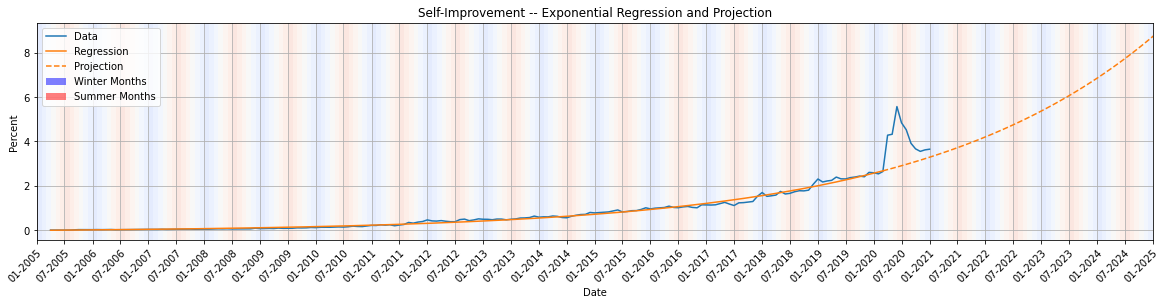

In [64]:
long_graph(end_date=datetime(2025,1,1))
extended_date_range = pd.period_range(start=datetime(2020,2,1), end=datetime(2025,1,1), freq="M")

plt.plot_date(num_checkouts.datetime, num_checkouts.Percent_self, "-")
plt.plot_date(num_checkouts.datetime[:-10], exponential_y, "-")

extended_reg = exponential(shrink_datetime(extended_date_range), *exponential_params)
plt.plot_date(extended_date_range, extended_reg, "--", color=def_colors[1])

add_background(end_date=datetime(2025,1,1))

plt.title("Self-Improvement -- Exponential Regression and Projection")
custom_legend(["Data", "Regression", "Projection"], shapes=["line", "line", "dash"], colors=[None, None, def_colors[1]], background=True)
plt.show()

Since the exponential function is unbounded, it cannot accurately predict the popularity of this subject in future years. The model predicts that the popularity will surpass 8% by 2025, which is obviously unrealistic. In the future, when more data is available, a better function (such as a logistic curve) might more accurately represent the data.

# Exercise and Fitness

Throughout this project, analysis has tended to err on the side of using fewer keywords rather than too many. For subjects where other potential keywords existed, additional plots were made to confirm that the results were approximately the same in both cases. However, in order to better emphasize the impact of keyword choice on the final results, we will analyze the subjects "exercise" and "fitness" (which are essentially synonyms) separately and compare the data derived from these keywords. Then, we will analyze the results when both keywords are used together.

In [65]:
subj_exercise = sum_subjects(checkouts, ["exercise"])
num_checkouts = join_with_checkouts(num_checkouts, subj_exercise, "_exercise")

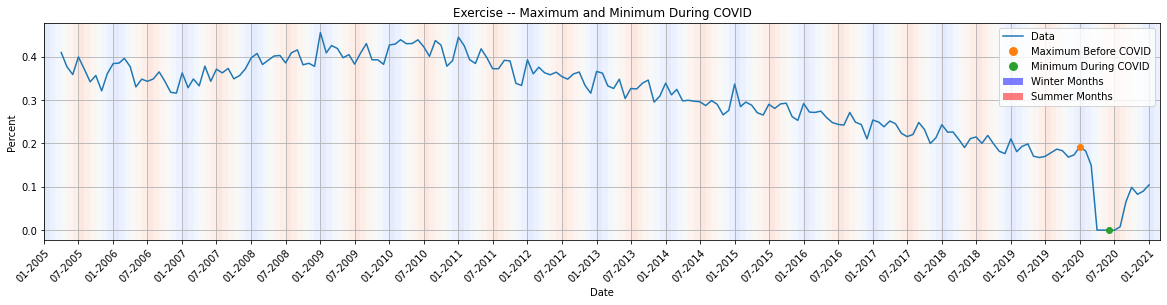

In [66]:
long_graph()
plt.plot_date(num_checkouts.datetime, num_checkouts.Percent_exercise, "-")

covid_region = num_checkouts[num_checkouts.datetime >= datetime(2019,12,1)]
covid_max = covid_region[covid_region.Percent_exercise == max(covid_region.Percent_exercise)]
covid_min = covid_region[covid_region.Percent_exercise == min(covid_region.Percent_exercise)]
plt.plot_date(covid_max.datetime, covid_max.Percent_exercise)
plt.plot_date(covid_min.datetime.iloc[0], covid_min.Percent_exercise.iloc[0])
max_percent = covid_max.Percent_exercise.iloc[0]
min_percent = covid_min.Percent_exercise.iloc[0]
change_percent = max_percent - min_percent

add_background()
plt.title("Exercise -- Maximum and Minimum During COVID")
custom_legend(["Data", "Maximum Before COVID", "Minimum During COVID"], shapes=["line", "point", "point"], background=True)
plt.show()

display(HTML("The percent of checkouts about exercise decreased by {:.2f}% after COVID began (which is a percent change of {:.2f}%).".format(change_percent, change_percent/max_percent*100)))

We see that exercise has been steadily declining in popularity since 2010. Since the percent of checkouts about this topic is low, a similar change to the knitting subject occured during COVID: namely, the percent of checkouts fell to 0%. In general, this decline can be accounted for by noting that the internet (and online videos) have emerged as a much better medium for exercise instruction than books, and hence the percent of checkouts about this subject has decreased.

The data appears to remain relatively constant before beginning a linear decrease in 2011. One function that has these characteristics is the softplus function, which is essentially a smooth estimation of the ramp function. Although not typically used in regression (it was derived for use in neural networks), we will use it to fit the data. It has the form:

$$y=-D\log(1+Ce^{Bx})+A$$

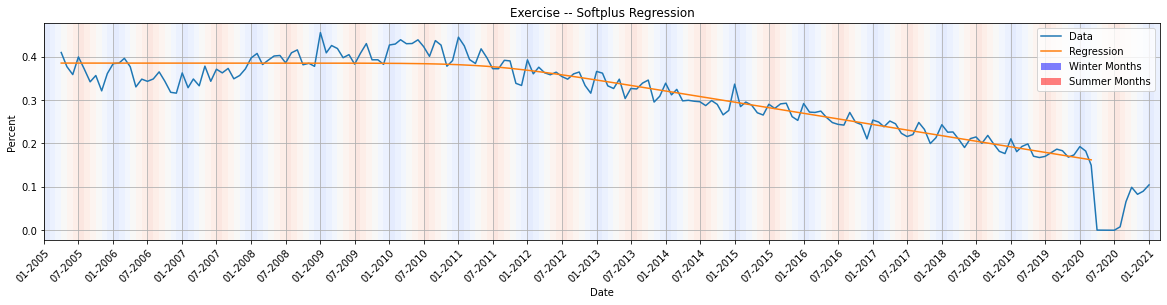

In [67]:
def softplus(x, A, B, C, D):
    return -D*np.log(1+C*np.exp(B*x))+A

long_graph()
plt.plot_date(num_checkouts.datetime, num_checkouts.Percent_exercise, "-")
p0=[0.3855, 8.9888, 7.8563e-25, 0.0038]
regression_x = shrink_datetime(num_checkouts.datetime[:-10])
softplus_params, _ = curve_fit(softplus, regression_x, num_checkouts[:-10].Percent_exercise, p0=p0, bounds=([-np.inf, -np.inf, 0, -np.inf], [np.inf, np.inf, 1e-2, np.inf]))
softplus_y = softplus(regression_x, *softplus_params)
plt.plot_date(num_checkouts.datetime[:-10], softplus_y, "-")
add_background()

plt.title("Exercise -- Softplus Regression")
custom_legend(["Data", "Regression"], background=True)
plt.show()

The model fits the data well and represents the important aspects of the trends. However, if the goal is to fit the data with a more specific function that can accurately estimate the percent of checkouts between 2005 and 2011, a different model will be required which can represent the mimimum around 2007 and the maximum around 2010. One choice would be to use a rational function. Specifically, by making the degree of the numerator one greater than that of the denominator, we can obtain a function that has a slant asymptote while also having a complex shape in a given region. After experimentation, the form of the model was choosen to be:

$$y=-A\frac{(Bx+C)^3+D(Bx+C)}{(Bx+C)^2+E}+F$$

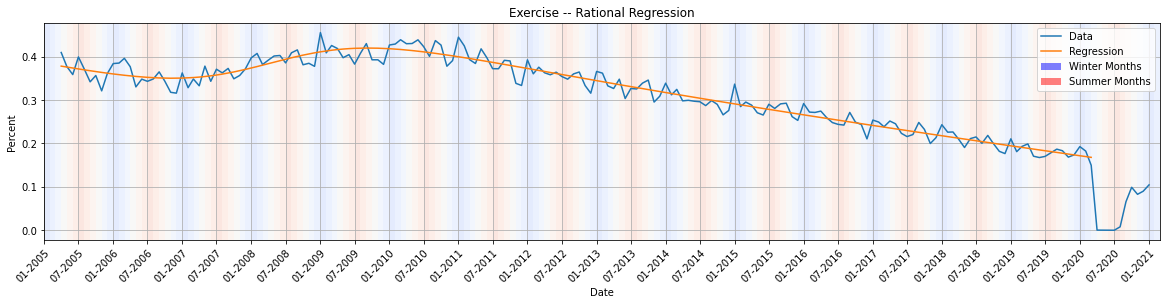

In [68]:
def rational(x, A, B, C, D, E, F):
    return -A*((B*x+C)**3+D*(B*x+C))/((B*x+C)**2+E)+F

long_graph()
plt.plot_date(num_checkouts.datetime, num_checkouts.Percent_exercise, "-")
p0=[-9.5631e-03, -2.9360e+00,  1.1627e+01, -4.9627e+01, 2.4554e+01,  3.8489e-01]
regression_x = shrink_datetime(num_checkouts.datetime[:-10])
rational_params, _ = curve_fit(rational, regression_x, num_checkouts[:-10].Percent_exercise, p0=p0, maxfev=10000)
rational_y = rational(regression_x, *rational_params)
plt.plot_date(num_checkouts.datetime[:-10], rational_y, "-")
add_background()

plt.title("Exercise -- Rational Regression")
custom_legend(["Data", "Regression"], background=True)
plt.show()

This model is by far a better fit, although it is without a doubt an example of overfitting the data. Below is a projection of both models into future years.

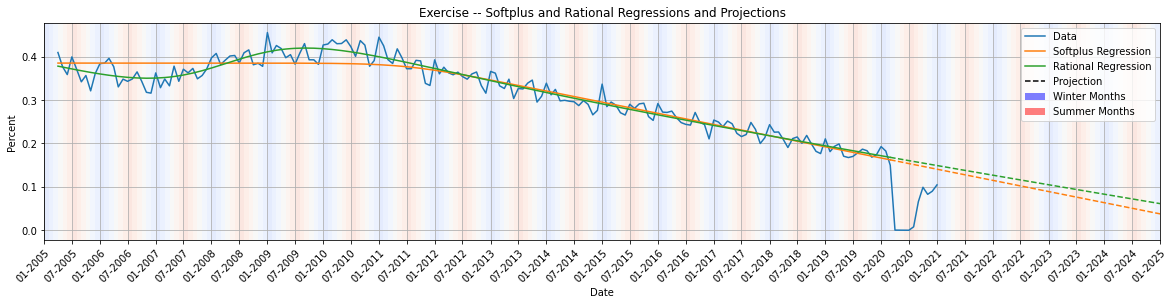

In [69]:
long_graph(end_date=datetime(2025,1,1))
extended_date_range = pd.period_range(start=datetime(2020,2,1), end=datetime(2025,1,1), freq="M")

plt.plot_date(num_checkouts.datetime, num_checkouts.Percent_exercise, "-")
plt.plot_date(num_checkouts.datetime[:-10], softplus_y, "-")
plt.plot_date(num_checkouts.datetime[:-10], rational_y, "-")

extended_softplus = softplus(shrink_datetime(extended_date_range), *softplus_params)
plt.plot_date(extended_date_range, extended_softplus, "--", color=def_colors[1])
extended_rational = rational(shrink_datetime(extended_date_range), *rational_params)
plt.plot_date(extended_date_range, extended_rational, "--", color=def_colors[2])

add_background(end_date=datetime(2025,1,1))

plt.title("Exercise -- Softplus and Rational Regressions and Projections")
custom_legend(["Data", "Softplus Regression", "Rational Regression", "Projection"], shapes=["line", "line", "line", "dash"], colors=[None, None, None, "black"], background=True)
plt.show()

Both models produce similar projections, with the softplus regression predicting a slightly faster decrease than the rational regression. However, since the popularity of a subject is nonnegative, both models will reach a point in time when they are no longer feasible. The linear decrease must eventually level out asymptotically or begin some new trend. There is no indication in present data of how the trends in the popularity of exercise will continue, so until more data becomes available, a better model cannot be made.

Next, we will analyze the keyword "fitness."

In [70]:
subj_fitness = sum_subjects(checkouts, ["fitness"])
num_checkouts = join_with_checkouts(num_checkouts, subj_fitness, "_fitness")

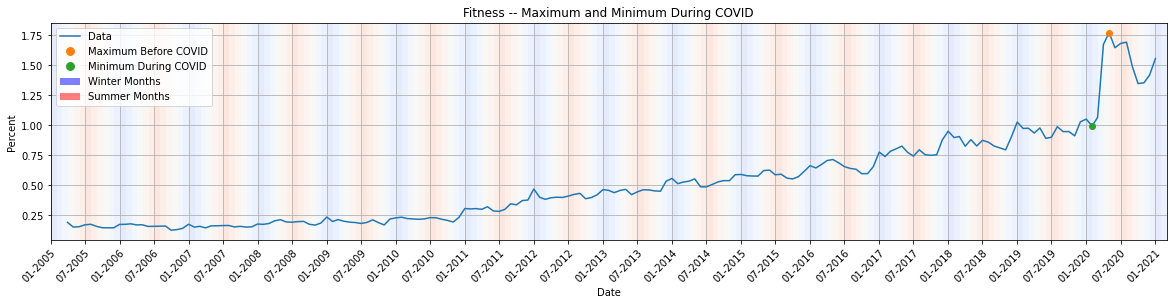

In [71]:
long_graph()
plt.plot_date(num_checkouts.datetime, num_checkouts.Percent_fitness, "-")

covid_region = num_checkouts[num_checkouts.datetime >= datetime(2019,12,1)]
covid_max = covid_region[covid_region.Percent_fitness == max(covid_region.Percent_fitness)]
covid_min = covid_region[covid_region.Percent_fitness == min(covid_region.Percent_fitness)]
plt.plot_date(covid_max.datetime, covid_max.Percent_fitness)
plt.plot_date(covid_min.datetime.iloc[0], covid_min.Percent_fitness.iloc[0])
max_percent = covid_max.Percent_fitness.iloc[0]
min_percent = covid_min.Percent_fitness.iloc[0]
change_percent = max_percent - min_percent

add_background()
plt.title("Fitness -- Maximum and Minimum During COVID")
custom_legend(["Data", "Maximum Before COVID", "Minimum During COVID"], shapes=["line", "point", "point"], background=True)
plt.show()

display(HTML("The percent of checkouts about fitness increased by {:.2f}% after COVID began (which is a percent change of {:.2f}%).".format(change_percent, change_percent/min_percent*100)))

Clearly, the trends in fitness are very different from the trends in exercise. Rather than decreasing, the percent of 
checkouts about fitness have increased significantly over time and experienced a .78% increase during COVID. This shows that the choice of keywords can have a large impact on the trends in the data, and should be choosen with care.

The increase appears to be exponential, and there does not appear to be a strong annual fluctuation, so we will begin by fitting the data with a regular exponential function.

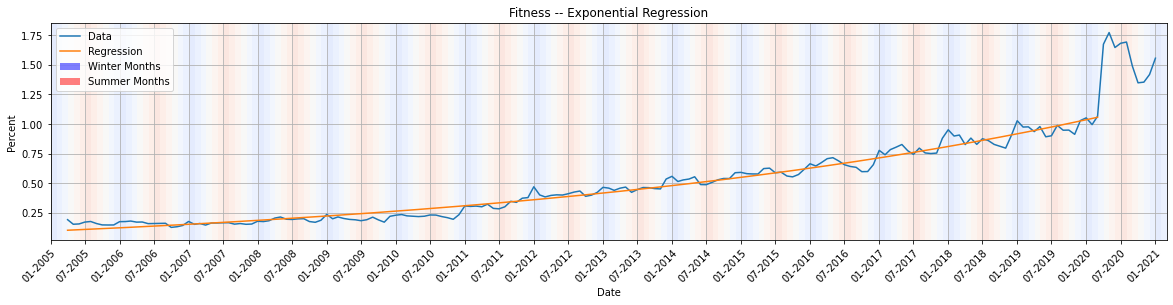

In [72]:
long_graph()
plt.plot_date(num_checkouts.datetime, num_checkouts.Percent_fitness, "-")
regression_x = shrink_datetime(num_checkouts.datetime[:-10])
exponential_params, _ = curve_fit(exponential, regression_x, num_checkouts.Percent_fitness[:-10])
exponential_y = exponential(regression_x, *exponential_params)
plt.plot_date(num_checkouts.datetime[:-10], exponential_y, "-")
add_background()

plt.title("Fitness -- Exponential Regression")
custom_legend(["Data", "Regression"], background=True)
plt.show()

This model does not accurately model the percent of checkouts between 2005 and 2011. Specifically, this region needs to be modelled with a flatter curve. From before, one model that may be helpful is the softplus function, which will have a much more sudden change between the constant region and the increasing region.

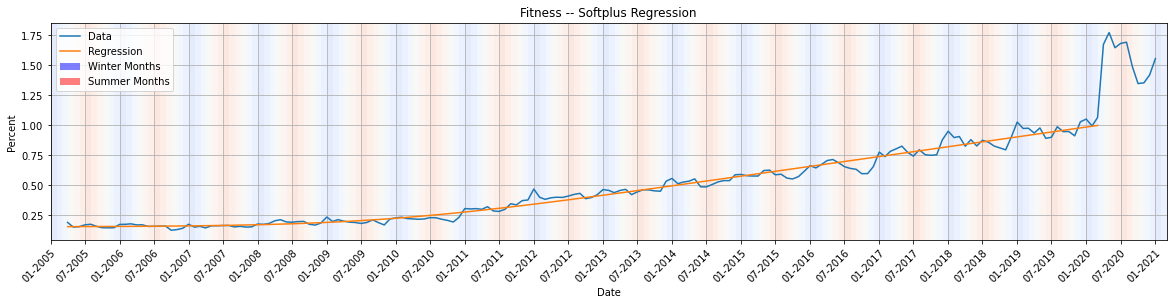

In [73]:
long_graph()
plt.plot_date(num_checkouts.datetime, num_checkouts.Percent_fitness, "-")
regression_x = shrink_datetime(num_checkouts.datetime[:-10])
p0 = [ 1.5292e-1,  1.1783e+0,  2.3808e-3, -9.5538e-2]
softplus_params, _ = curve_fit(softplus, regression_x, num_checkouts.Percent_fitness[:-10], p0=p0)
softplus_y = softplus(regression_x, *softplus_params)
plt.plot_date(num_checkouts.datetime[:-10], softplus_y, "-")
add_background()

plt.title("Fitness -- Softplus Regression")
custom_legend(["Data", "Regression"], background=True)
plt.show()

This model appears to fit the data much better, indicating that the increase is linear in nature, not exponential. Below is a projection of the model.

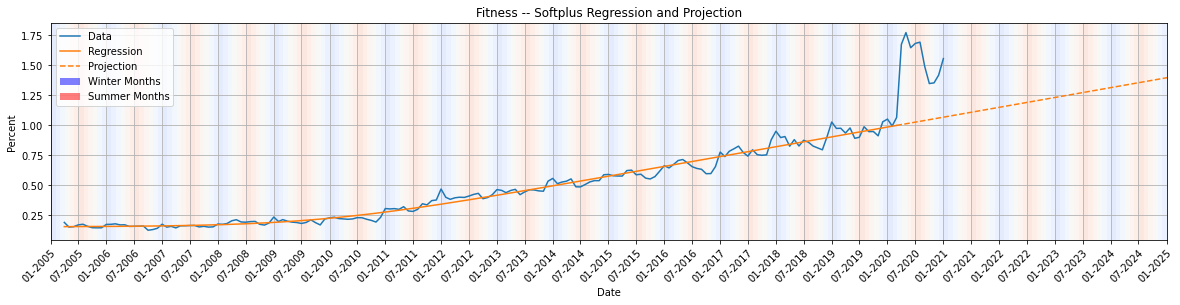

In [74]:
long_graph(end_date=datetime(2025,1,1))
extended_date_range = pd.period_range(start=datetime(2020,2,1), end=datetime(2025,1,1), freq="M")

plt.plot_date(num_checkouts.datetime, num_checkouts.Percent_fitness, "-")
plt.plot_date(num_checkouts.datetime[:-10], softplus_y, "-")

extended_reg = softplus(shrink_datetime(extended_date_range), *softplus_params)
plt.plot_date(extended_date_range, extended_reg, "--", color=def_colors[1])

add_background(end_date=datetime(2025,1,1))

plt.title("Fitness -- Softplus Regression and Projection")
custom_legend(["Data", "Regression", "Projection"], shapes=["line", "line", "dash"], colors=[None, None, def_colors[1]], background=True)
plt.show()

This model will eventually fail to predict feasible percents, since it is unbounded. Again, however, there is little indication of how the data will actually behave as time continues, so this is the best model we can make so far (without making unjustified assumptions).

Finally, due to the vast differences in the behavior of the two keywords, we will analyze them together.

In [75]:
subj_exercise2 = sum_subjects(checkouts, ["exercise", "fitness"])
num_checkouts = join_with_checkouts(num_checkouts, subj_exercise2, "_exercise2")

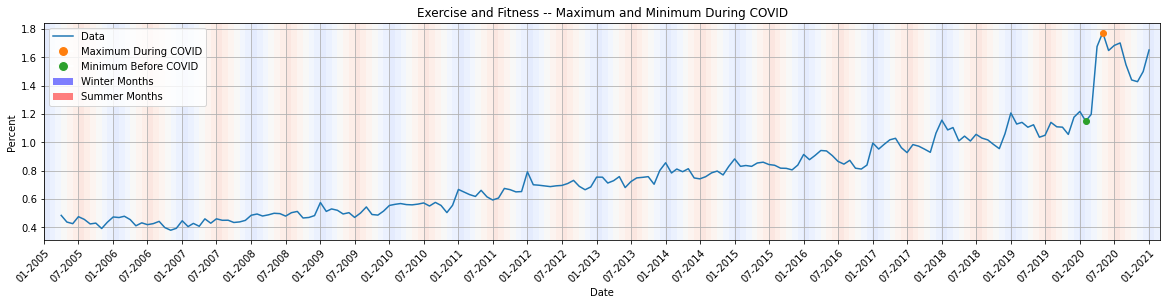

In [76]:
long_graph()
plt.plot_date(num_checkouts.datetime, num_checkouts.Percent_exercise2, "-")

covid_region = num_checkouts[num_checkouts.datetime >= datetime(2019,12,1)]
covid_max = covid_region[covid_region.Percent_exercise2 == max(covid_region.Percent_exercise2)]
covid_min = covid_region[covid_region.Percent_exercise2 == min(covid_region.Percent_exercise2)]
plt.plot_date(covid_max.datetime, covid_max.Percent_exercise2)
plt.plot_date(covid_min.datetime, covid_min.Percent_exercise2)
max_percent = covid_max.Percent_exercise2.iloc[0]
min_percent = covid_min.Percent_exercise2.iloc[0]
change_percent = max_percent - min_percent

add_background()
plt.title("Exercise and Fitness -- Maximum and Minimum During COVID")
custom_legend(["Data", "Maximum During COVID", "Minimum Before COVID"], shapes=["line", "point", "point"], background=True)
plt.show()

display(HTML("The percent of checkouts about exercise and fitness increased by {:.2f}% after COVID began (which is a percent change of {:.2f}%).".format(change_percent, change_percent/min_percent*100)))

covid_change_dict["exercise2"] = change_percent
percent_change_dict["exercise2"] = change_percent/min_percent*100

When analyzed in conjunction, we see that there is an increase in the popularity of this subject, both overtime and due to COVID. The increase appears to occur at a constant rate, so we will fit the data with a linear function.

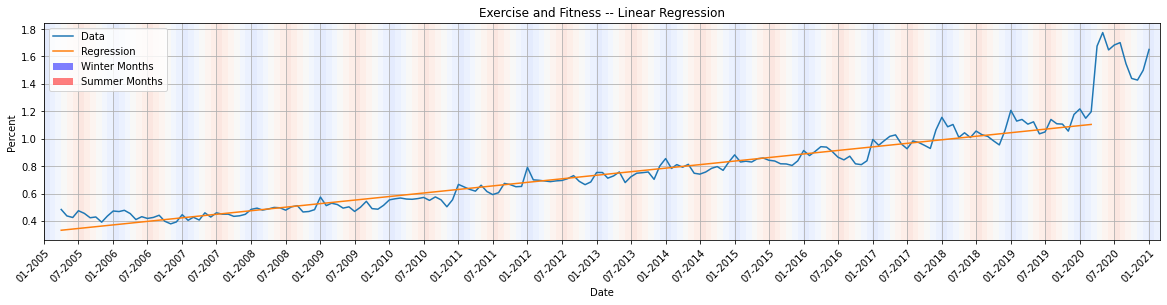

In [77]:
long_graph()
plt.plot_date(num_checkouts.datetime, num_checkouts.Percent_exercise2, "-")
regression_x = shrink_datetime(num_checkouts.datetime[:-10])
linear_params = np.polyfit(regression_x, num_checkouts.Percent_exercise2[:-10], 1)
reg = np.poly1d(linear_params)
plt.plot_date(num_checkouts.datetime[:-10], reg(regression_x), "-")
add_background()

plt.title("Exercise and Fitness -- Linear Regression")
custom_legend(["Data", "Regression"], background=True)
plt.show()

regression_x_dict["exercise2"] = num_checkouts.datetime[:-10]
regression_y_dict["exercise2"] = reg(regression_x)

Like our other linear models, this model will eventually fail to predict reasonable percents. Nevertheless, here is the projection of the model:

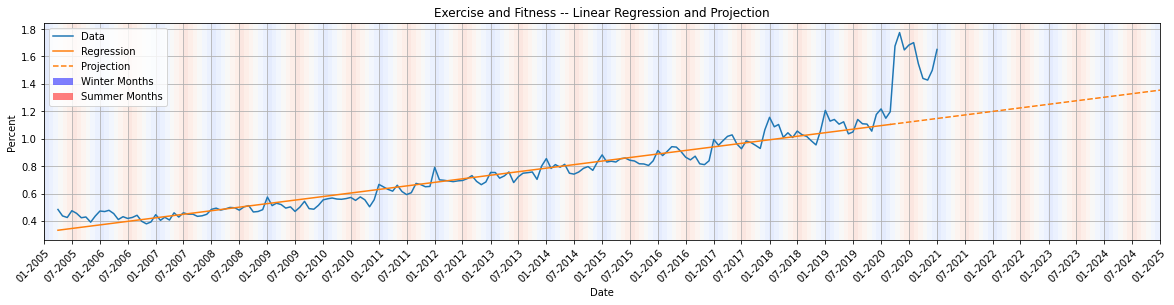

In [78]:
long_graph(end_date=datetime(2025,1,1))
extended_date_range = pd.period_range(start=datetime(2020,2,1), end=datetime(2025,1,1), freq="M")

plt.plot_date(num_checkouts.datetime, num_checkouts.Percent_exercise2, "-")
plt.plot_date(num_checkouts.datetime[:-10], reg(regression_x), "-")

plt.plot_date(extended_date_range, reg(shrink_datetime(extended_date_range)), "--", color=def_colors[1])

add_background(end_date=datetime(2025,1,1))

plt.title("Exercise and Fitness -- Linear Regression and Projection")
custom_legend(["Data", "Regression", "Projection"], shapes=["line", "line", "dash"], colors=[None, None, def_colors[1]], background=True)
plt.show()

# Results

The first part of our question was:
> How do the popularity of different subject books vary over time?

Below is a summary of the data and regression models used for each subject.

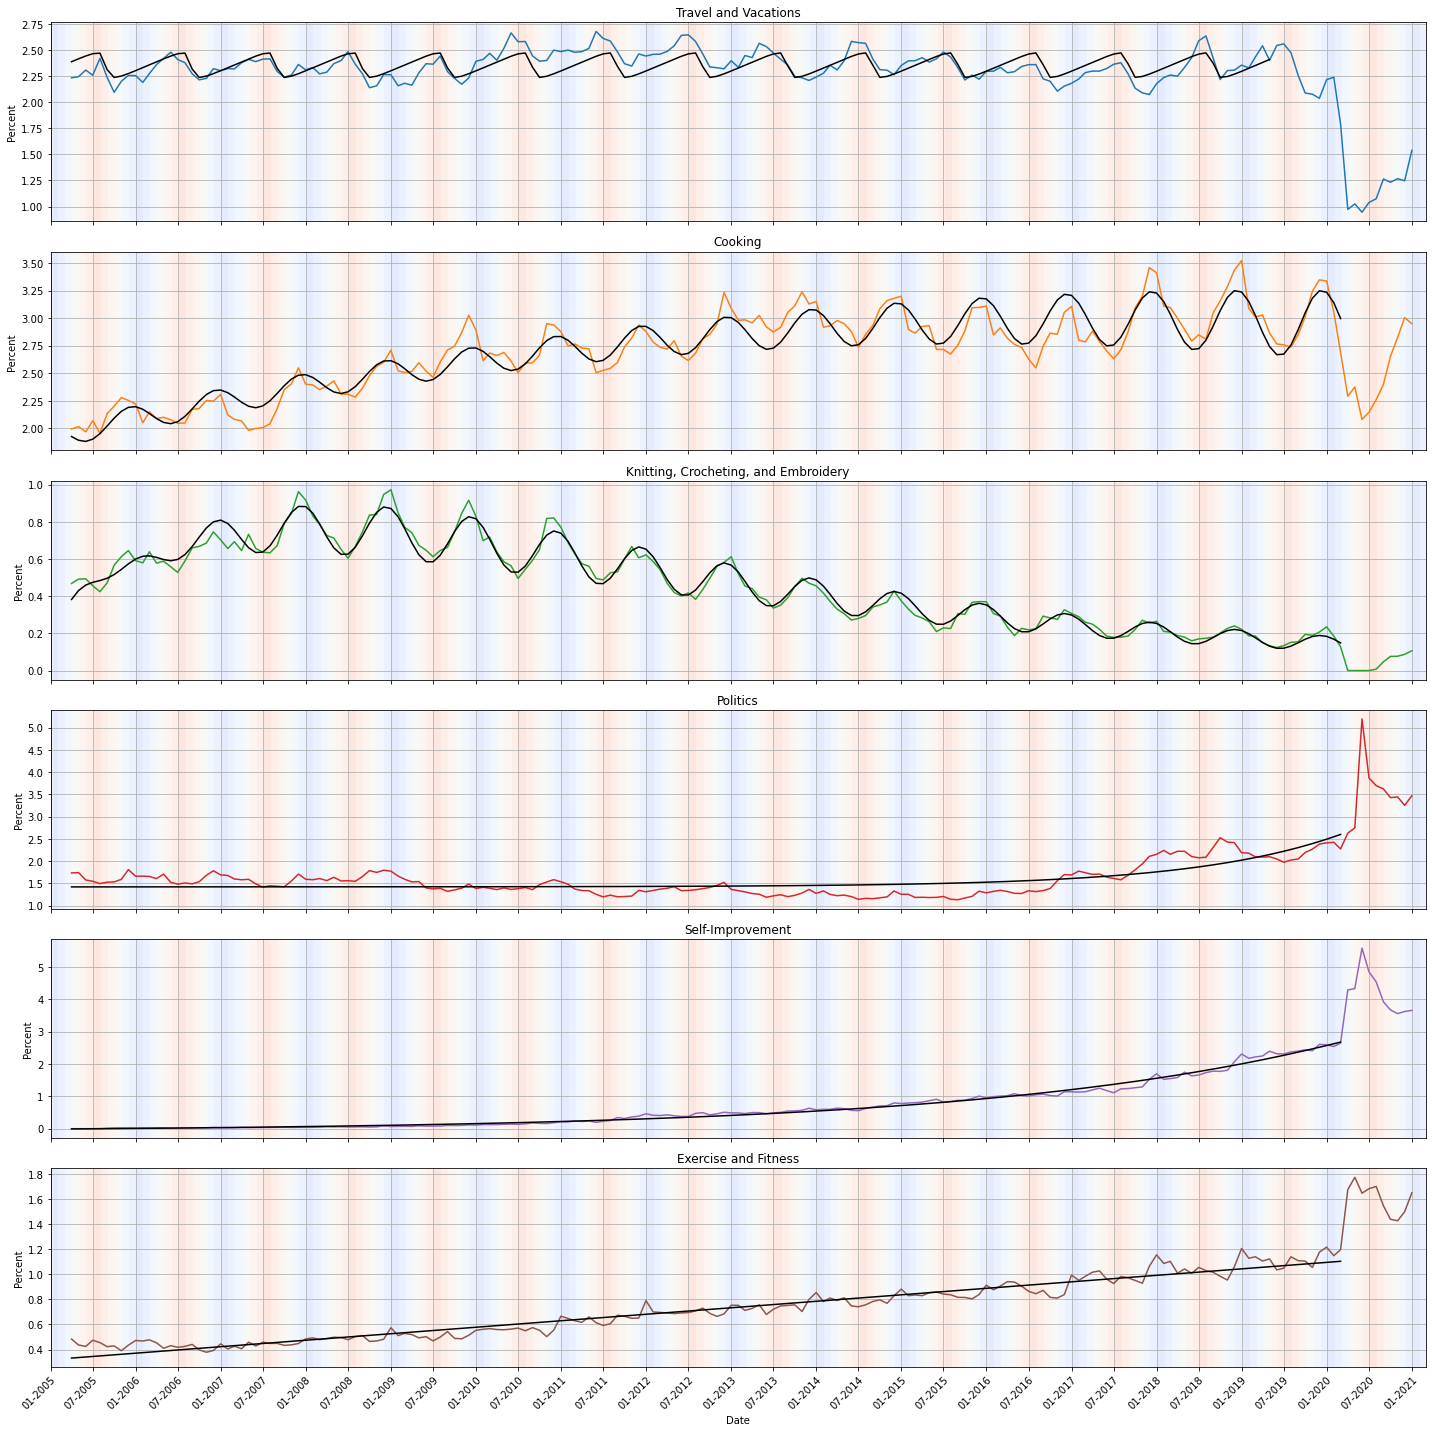

In [79]:
cols = ["vacation", "cook", "knit", "politics", "self", "exercise2"]
titles = ["Travel and Vacations", "Cooking", "Knitting, Crocheting, and Embroidery", "Politics", "Self-Improvement", "Exercise and Fitness"]

plt.figure(figsize=(20,20))
for i, (col, title) in enumerate(zip(cols, titles)):
    plt.subplot(6,1,i+1)
    long_graph(size=None)
    if i!=5:
        ticks, labels = plt.xticks()
        plt.xticks(ticks, "")
        plt.xlabel("")
    plt.plot_date(num_checkouts.datetime, num_checkouts["Percent_"+col], linestyle="-", marker="", color=def_colors[i])
    plt.plot_date(regression_x_dict[col], regression_y_dict[col], linestyle="-", marker="", color="black")
    plt.title(title)
    add_background()

plt.tight_layout()
plt.show()

The overall trends vary by subject. For politics, self-improvement, exercise, and cooking, the popularities increased over time. This increase was the most consistent for exercise, which was fit with a linear model. The increase was exponential for self-improvement, indicating that the increase has been larger in recent years. Politics did not exhibit many variations in popularity until 2017, after which the subject increased in popularity by close to 1%. Cooking exhibited a faster increase in earlier years and a slower increase in recent years (which is why it was fitted quadratically).

The average popularity of travel remained constant over time, with popularity between 2.25% and 2.50%.

The popularity of knitting began with an increase until 2008, but after that began decreasing significantly. The decrease slows down as time progresses and becomes asymptotic in nature.

Travel, cooking, and knitting all exhibited periodic trends by year. Below is a plot showing the months of the maxima and minima within each period. In the following code, the `suptitle` and `figlegend` functions were found from the Matplotlib documentation ("Pyplot"). Information for making polar plots was obtained from examples provided by Matplotlib ("Scatter Plot on Polar Axis"). A fix for `suptitle` when using `tight_layout` was provided by StackOverflow (James).

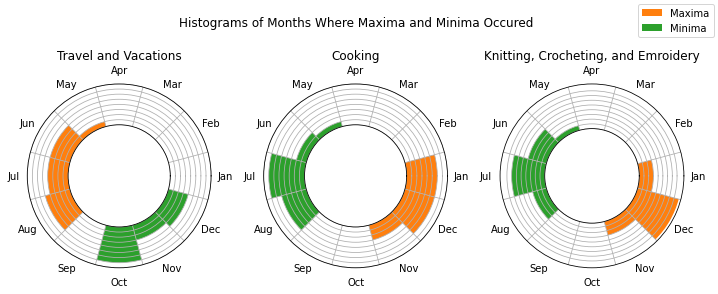

In [80]:
maximums_list = [maximums_dict["vacation"], maximums_dict["cook"], maximums_dict["knit"]]
minimums_list = [minimums_dict["vacation"], minimums_dict["cook"], minimums_dict["knit"]]
subject_list = ["Travel and Vacations", "Cooking", "Knitting, Crocheting, and Emroidery"]

plt.figure(figsize=(10,10))
plt.gcf().suptitle("Histograms of Months Where Maxima and Minima Occured")
for i, (maximums, minimums, subject) in enumerate(zip(maximums_list, minimums_list, subject_list)):
    plt.subplot(1,3,i+1,projection="polar")
    
    max_hist = maximums.index.get_level_values(1).value_counts().reindex(range(1,13)).fillna(0)
    min_hist = minimums.index.get_level_values(1).value_counts().reindex(range(1,13)).fillna(0)
        
    plt.bar(np.linspace(0,2*np.pi,12,endpoint=False), max_hist, width=np.pi/6, color=def_colors[1])
    plt.bar(np.linspace(0,2*np.pi,12,endpoint=False), min_hist, width=np.pi/6, color=def_colors[2])

    plt.xticks(np.linspace(0,2*np.pi,12,endpoint=False), labels=(str(datetime(2000,x,1).strftime("%b")) for x in range(1,13)))
    plt.gca().set_xticks(np.linspace(15/180*np.pi,375/180*np.pi,12,endpoint=False), minor=True)
    plt.yticks(range(9),"")
    plt.gca().set_rorigin(-10)
    plt.gca().set_rlabel_position(15)
    plt.grid(False, which="major", axis="x")
    plt.grid(True, which="minor")
    plt.title(subject)

plt.tight_layout()
plt.gcf().subplots_adjust(top=1.5)
plt.figlegend(["Maxima", "Minima"])
plt.show()

Travel is the most popular in the summer, and is the least population in the late fall/early winter. The months of the maxima and minima are not directly opposite each other; rather, the decrease takes less time than the increase within each period. This was the justification for the skewed sine regression used above.

Cooking is the most population in the early winter and the least popular in the summer. This may be because of the vast amount of cooking done for Thanksgiving and Christmas, or there may be a general inclination to cook more complex meals in the winter. The maxima and minima appear to be directly opposite each other, with perhaps a slightly faster increase than decrease.

Knitting is the most poplation in the early winter (December) and the least popular in the summer. Again, the maxima and minima are approximately opposite each other.

In order to visualize the popularity of the subjects with respect to each other, the following graphs shows the data for all of the subjects plotted on the same axes.

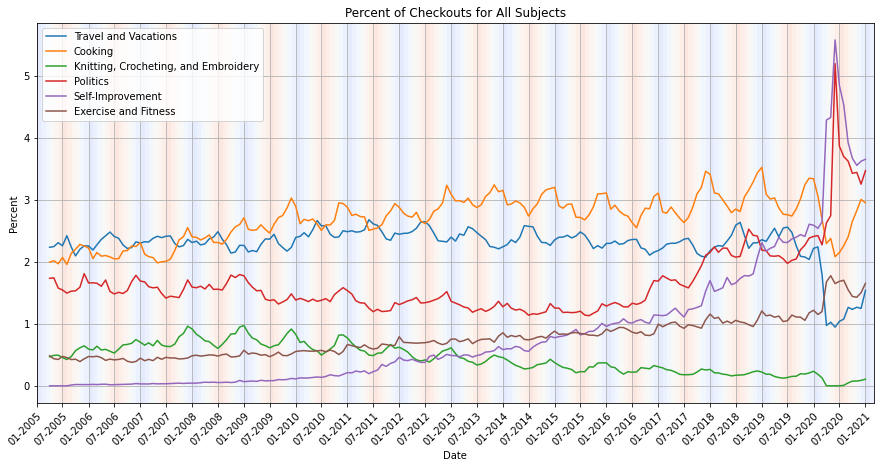

In [81]:
long_graph(size=(15,7))
for i, (col, title) in enumerate(zip(cols, titles)):
    plt.plot_date(num_checkouts.datetime, num_checkouts["Percent_"+col], linestyle="-", marker="", color=def_colors[i], label=title)
plt.title("Percent of Checkouts for All Subjects")
plt.legend()
add_background()
plt.show()

We see that travel and cooking have similar popularities, with cooking emerging as more popular after 2011. Politics is the next most popular. Knitting, exercise, and self-improvement have similar popularities. Before 2012, the order of popularity was knitting, then exercise, then self-improvement. However, after 2015, the order of popularity reversed, due to the exponential increase in self-improvement, the linear increase in exercise, and the decrease in knitting.

This graph also provides insight on the second part of our question:
> How has COVID affected these trends?

Both politics and self-improvement experienced similar spikes in popularity, rising above all the other subjects. Both cooking and travel decreased significantly. Exercise increased slightly, just enough for it to surpas travel in popularity. Knitting decreased, remaining the least popular subject. To quantify these changes, a bar chart can be made.

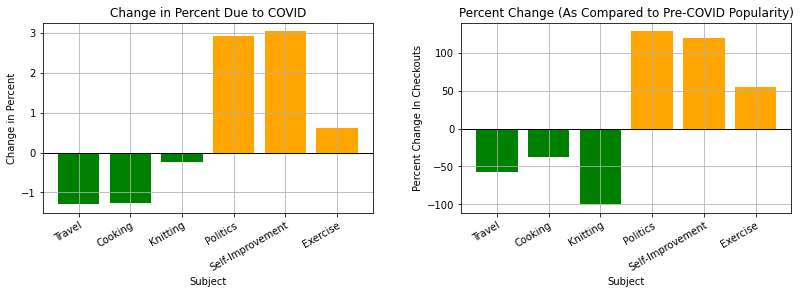

In [82]:
# cols = ["vacation", "cook", "knit", "politics", "self", "exercise2"]
titles = ["Travel", "Cooking", "Knitting", "Politics", "Self-Improvement", "Exercise"]

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.axhline(0, color="black", linewidth=1)
plt.bar(titles, covid_change_dict.values(), color=["green", "green", "green", "orange", "orange", "orange"])
plt.xticks(rotation="30", rotation_mode="anchor", ha="right")
plt.xlabel("Subject")
plt.ylabel("Change in Percent")
plt.title("Change in Percent Due to COVID")
plt.grid()

plt.subplot(1,2,2)
plt.axhline(0, color="black", linewidth=1)
plt.bar(titles, percent_change_dict.values(), color=["green", "green", "green", "orange", "orange", "orange"])
plt.xticks(rotation="30", rotation_mode="anchor", ha="right")
plt.xlabel("Subject")
plt.ylabel("Percent Change In Checkouts")
plt.title("Percent Change (As Compared to Pre-COVID Popularity)")
plt.grid()

plt.tight_layout(pad=4)
plt.show()

Travel, cooking, and knitting all decreased in popularity, whereas politics, self-improvement, and exercise increased. Travel and cooking decreased by similar amounts (about 1.25%), whereas knitting only decreased by .23%. Politics and self-improvement increased by similar amounts (about 3%), whereas exercise only increased by .63%.

Instead of analyzing the change in the percent of books checked out for each subject, we could analyze the percent change in this quantity. Among those that decreased, knitting decreased the most, dropping to 0% in popularity. Travel approxiamtely halved in popularity (57.76% decrease), whereas cooking decreased by a smaller amount (37.82% dercrease). Both politics and self-improvement still have similar increases (about 125%), so their popularities are more than doubling. Exercise only increased by about 55%.

# Discussion and Conclusions

As a summary from above, here are the results that were found. Travel, cooking, and knitting all decreased in popularity due to COVID (despite cooking previously increasing). Politics, self-improvement, and exercise were all initially increasing but experienced additional increases due to COVID. Additional discussion and explanations were presented in the methodology and results sections.

| Subject | Keywords | Trend Over Time | Periodic Trends | Change Due To COVID | Percent Change |
| :- | :- | :- | :- | :- | :- |
| Travel | "travel", "vacation" |  Constant | Max in summer, Min in late fall/early winter | -1.29% | -57.76% |
| Cooking | "cook" | Quadratic concave-down increase | Max in early winter, Min in summer | -1.27% | -37.82% |
| Knitting | "knit", "crochet", "embroidery" | Exponential concave-up decrease (preceded by a small increase) | Max in early winter, Min in summer | -.23% | -100% |
| Politics | "politic" | Exponential concave-up increase (close to constant)| NA | 2.92% | 128.57% |
| Self-Improvement | "self-improvement" | Exponential concave-up increase | NA | 3.04% | 119.65% |
| Exercise and Fitness | "exercise", "fitness" | Linear increase | NA | .63% | 54.41% |

Throughout this projection, several obstacles were encountered. The first was loading and cleaning the dataset. Due to the vast amount of data, loading the dataset alone took close to 20 minutes, and performing tasks like sorting and printing unique values took a substantial amount of time as well. The second difficulty was determining the best ways to remedy the inconsistencies in subject length. Ultimately, I decided to remove missing subjects and use fewer keywords (in order to only include the most relevant words likely to show up in a short subject line). Third, fitting the data with complicated compositions of functions proved difficult due to the high level of precision that curve_fit required for the initial guess. I had to experiment with many initial guesses, tuning them until the graph appeared in roughly the shape of the data (upon which curve_fit performed the remaining optimization).

In the future, I would try to find a different (or more detailed) dataset that included more consistent and specific information about the subjects of the books. This would reduce the amount of error in the results and allow for more accurate predictions. I would also define additional functions (such as for making the initial graphs, locating the maxima and minima, etc.) in order to speed up the process and allow for more subjects to be analyzed.

<center>Works Cited</center>

“Checkouts by Title.” *City of Seattle Open Data Portal*, City of Seattle, 6 Mar. 2021, [data.seattle.gov/Community/Checkouts-by-Title/tmmm-ytt6](https://data.seattle.gov/Community/Checkouts-by-Title/tmmm-ytt6). 

“Hours &amp; Locations.” *The Seattle Public Library*, The Seattle Public Library, www.spl.org.

James. “Huge Space between Title and Plot Matplotlib.” *Stack Overflow*, 5 Sept. 2016, [stackoverflow.com/a/39334324](https://stackoverflow.com/a/39334324). 

Mark, Lois Alter. “Knitting Has Become The Cool Activity During The Coronavirus Crisis.” *Forbes*, Forbes Magazine, 27 Mar. 2020, www.forbes.com/sites/loisaltermark/2020/03/27/knitting-has-become-the-cool-activity-during-the-coronavirus-crisis/?sh=412a884a921c.

McCaughan, Gareth. "Equation of a 'tilted' sine." *StackExchange*, 15 Sept. 2017, [math.stackexchange.com/a/2430837](https://math.stackexchange.com/a/2430837)

“The Nation's Largest Public Libraries” *LibGuides*, American Library Association, 13 Apr. 2017, [libguides.ala.org/libraryfacts](https://libguides.ala.org/libraryfacts).

“Pyplot.” *Matplotlib 2.0.2 Documentation*, The Matplotlib Development Team, 10 May 2017, [matplotlib.org/2.0.2/api/pyplot_api.html](https://matplotlib.org/2.0.2/api/pyplot_api.html). 

“Scatter Plot on Polar Axis.” *Matplotlib 3.4.1 Documentation*, The Matplotlib Development Team, 31 Mar. 2021, [matplotlib.org/stable/gallery/pie_and_polar_charts/polar_scatter.html](https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_scatter.html). 

tmdavison [Davison, Tom]. "Get default line colour cycle." *StackOverflow*, 7 Feb. 2017, [stackoverflow.com/a/42091037](https://stackoverflow.com/a/42091037).